In [34]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import calendar
import csv

In [35]:
# Load csv File
df = {'id': [], 'time': [], 'gl': []}

with open('../raw_data/Dubosson2018_processed.csv') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        # check for NAs
        if 'NA' in row:
            continue
        
        if row[0] == 'id': # exclude row with column names
            continue
            
        df['id'].append(row[0]) # add current row's id
        dt = datetime.strptime(row[1], '%Y-%m-%d %H:%M:%S') # convert timestamps to datetime format so graphs dont break
        df['time'].append(dt)
        df['gl'].append(float(row[2])) # Convert glucose levels to floats

df = pd.DataFrame(df)
df

,id,time,gl
0,001,2014-10-01 19:14:00,185.4
1,001,2014-10-01 19:19:00,178.2
2,001,2014-10-01 19:24:00,176.4
3,001,2014-10-01 19:29:00,172.8
4,001,2014-10-01 19:34:00,169.2
...,...,...,...
8050,009,2014-10-03 12:20:19,88.2
8051,009,2014-10-03 12:25:19,75.6
8052,009,2014-10-03 12:30:19,59.4
8053,009,2014-10-03 12:35:19,48.6


In [36]:
# sort by time
sorted_df = pd.DataFrame(df.sort_values(by = ["time"])).reset_index(drop=True)
sorted_df

,id,time,gl
0,008,2014-09-30 10:06:54,45.0
1,008,2014-09-30 10:11:54,46.8
2,008,2014-09-30 10:16:54,46.8
3,008,2014-09-30 10:21:54,46.8
4,008,2014-09-30 10:26:54,48.6
...,...,...,...
8050,001,2014-10-06 16:34:02,221.4
8051,001,2014-10-06 16:39:02,225.0
8052,001,2014-10-06 16:44:02,225.0
8053,001,2014-10-06 16:49:02,221.4


In [37]:
# # Raw plot of sort by time
# x = sorted_df.time
# y = sorted_df.gl

# fig, ax = plt.subplots(figsize = (12,4), dpi = 300)
# ax.plot(x, y)
# plt.title("Anderson")
# plt.xlabel("Date")
# plt.ylabel("Glucose Level")

# fig.autofmt_xdate() # slant x-axis
# plt.show()

In [38]:
# # group by day
# dates = []
# for time in sorted_df.time:
#     if [time.day, time.month, time.year] not in dates:
#         dates.append([time.day, time.month, time.year])

In [39]:
# # get segments by month
# segments = []
# group = {'id': [], 'time': [], 'gl': []}

# i = 0
# for date in dates:
#     while i < len(sorted_df):
#         if sorted_df.time[i].day == date[0] and sorted_df.time[i].month == date[1] and sorted_df.time[i].year == date[2]:
#             group['id'].append(sorted_df.id[i])
#             group['time'].append(sorted_df.time[i])
#             group['gl'].append(sorted_df.gl[i])
#         else:
#             break
#         i += 1
    
#     segments.append(pd.DataFrame(group).reset_index())
#     group = {'id': [], 'time': [], 'gl': []}

# print(segments)

In [40]:
# # Plot same month segment
# for segment in segments:
#     x = segment.time
#     y = segment.gl
    
#     fig, ax = plt.subplots(figsize = (32,5), dpi = 300)
#     ax.plot_date(x, y)
#     plt.title(f"{segment['time'][0].strftime('%b')} {segment.time[0].day}, {segment.time[0].year}")
#     plt.xlabel("Date")
#     plt.ylabel("Glucose Level")
    
#     fig.autofmt_xdate() # slant x-axis
#     plt.show()

In [41]:
# Grouping data by ID
IDs = []
for ID in df.id:
    if ID not in IDs:
        IDs.append(ID)

# Group Subject Data
subj_data = dict()
for ID in IDs:
    subj_data[ID] = df.loc[df['id'] == ID].reset_index(drop=True)

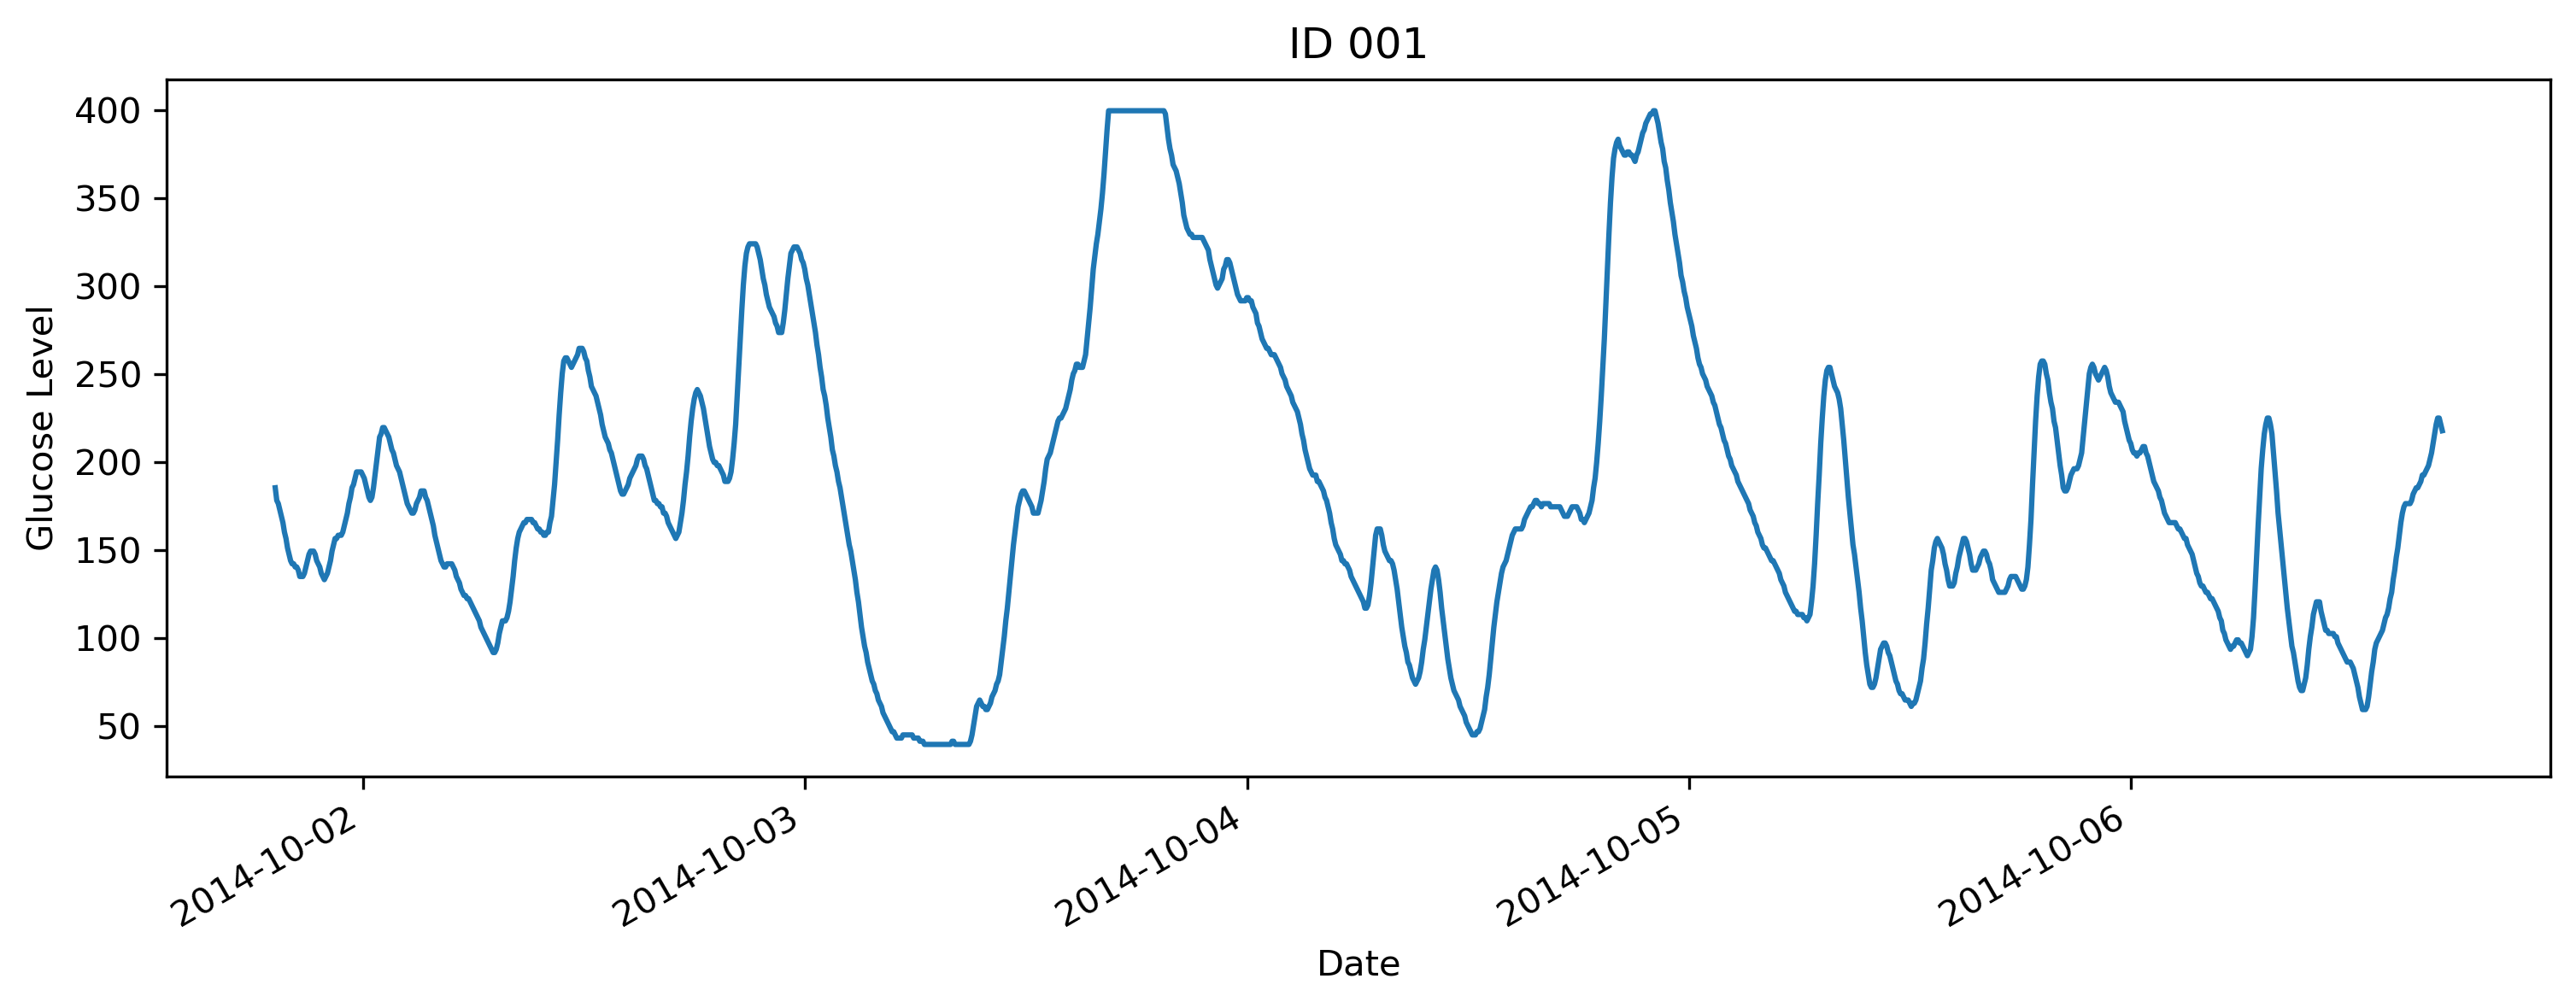

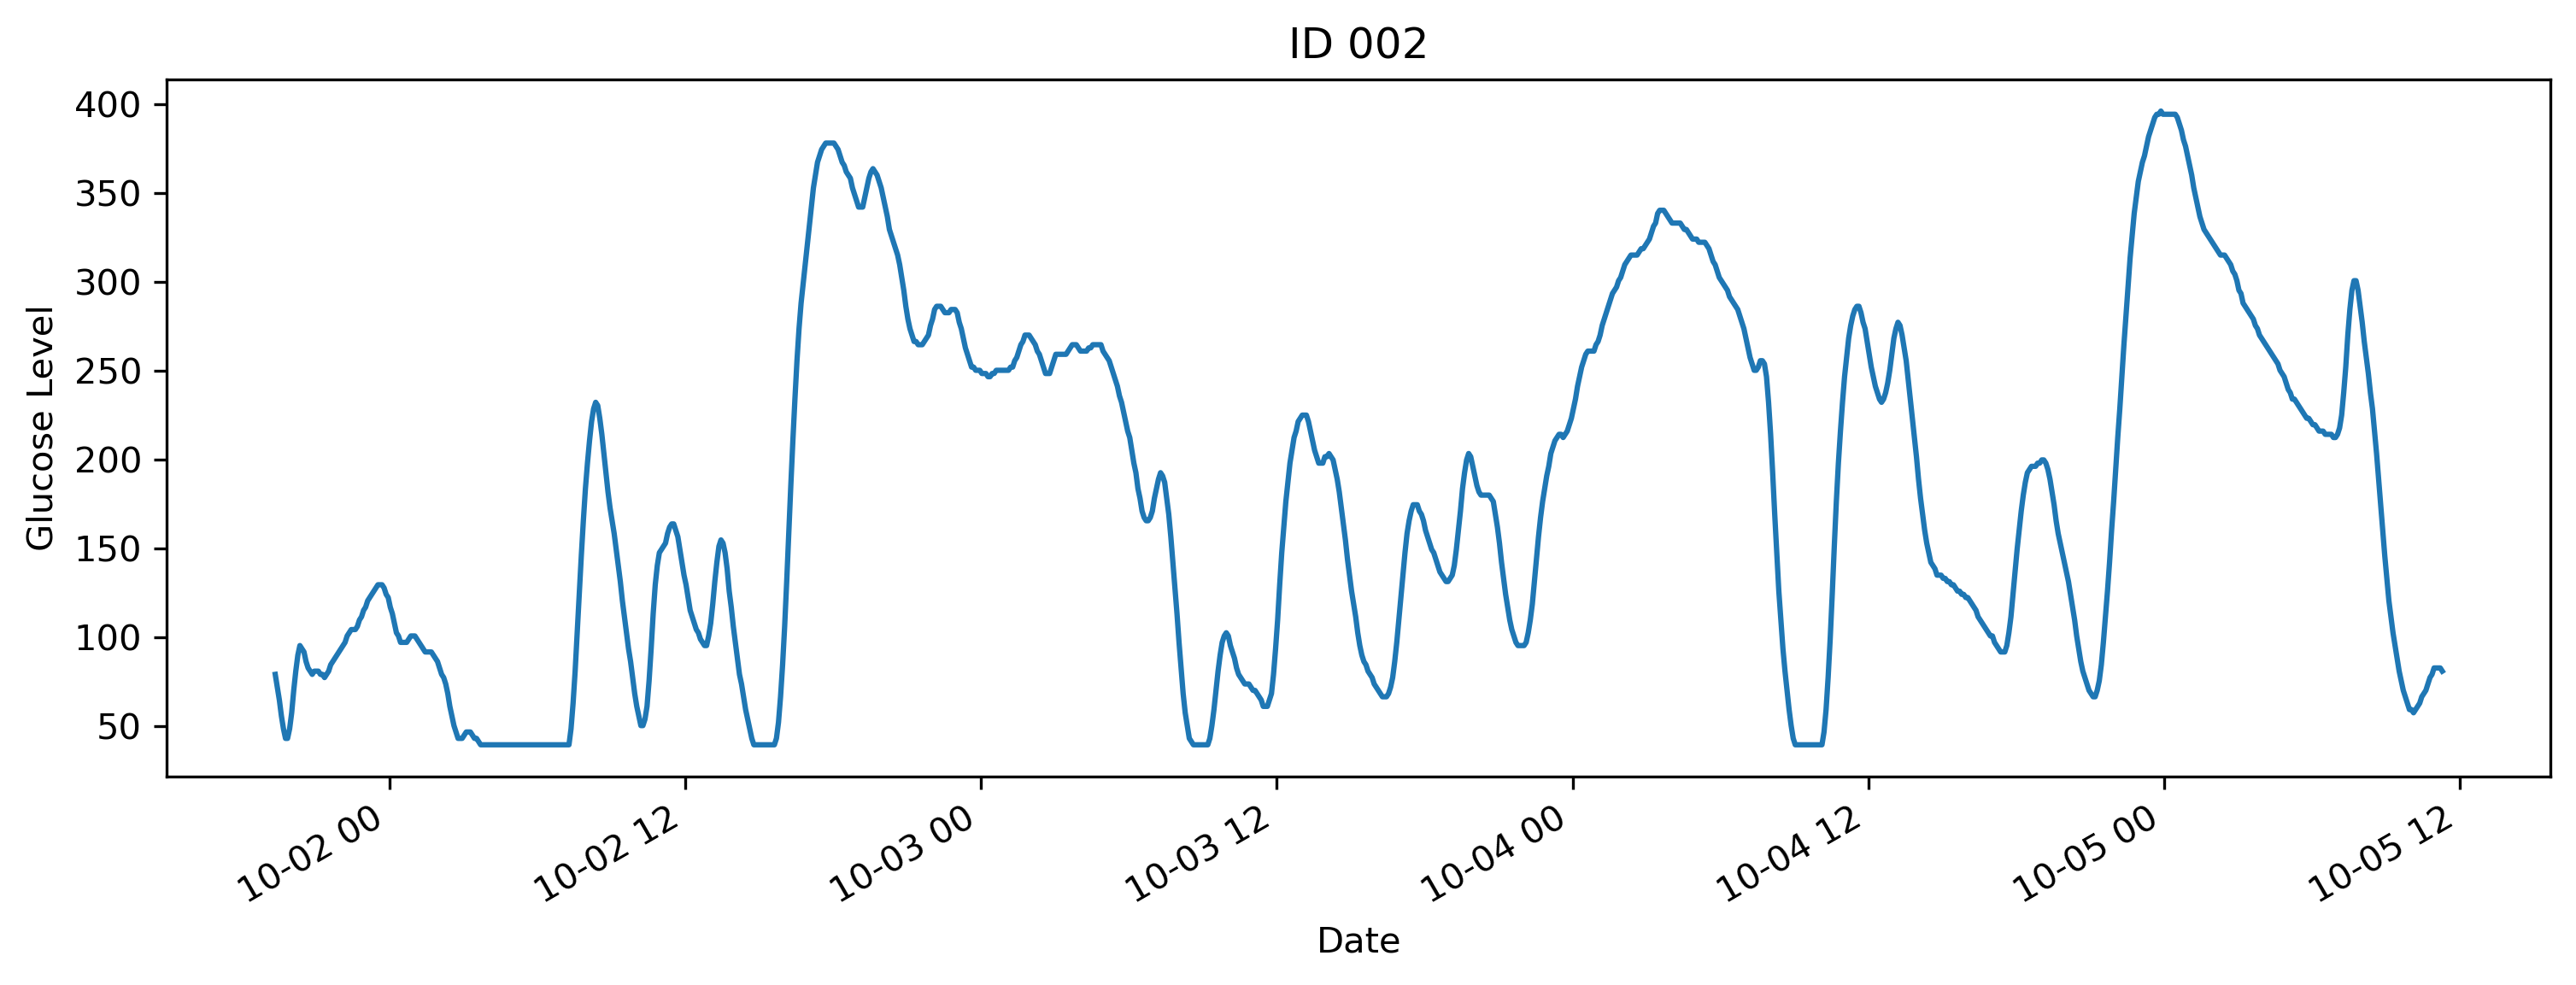

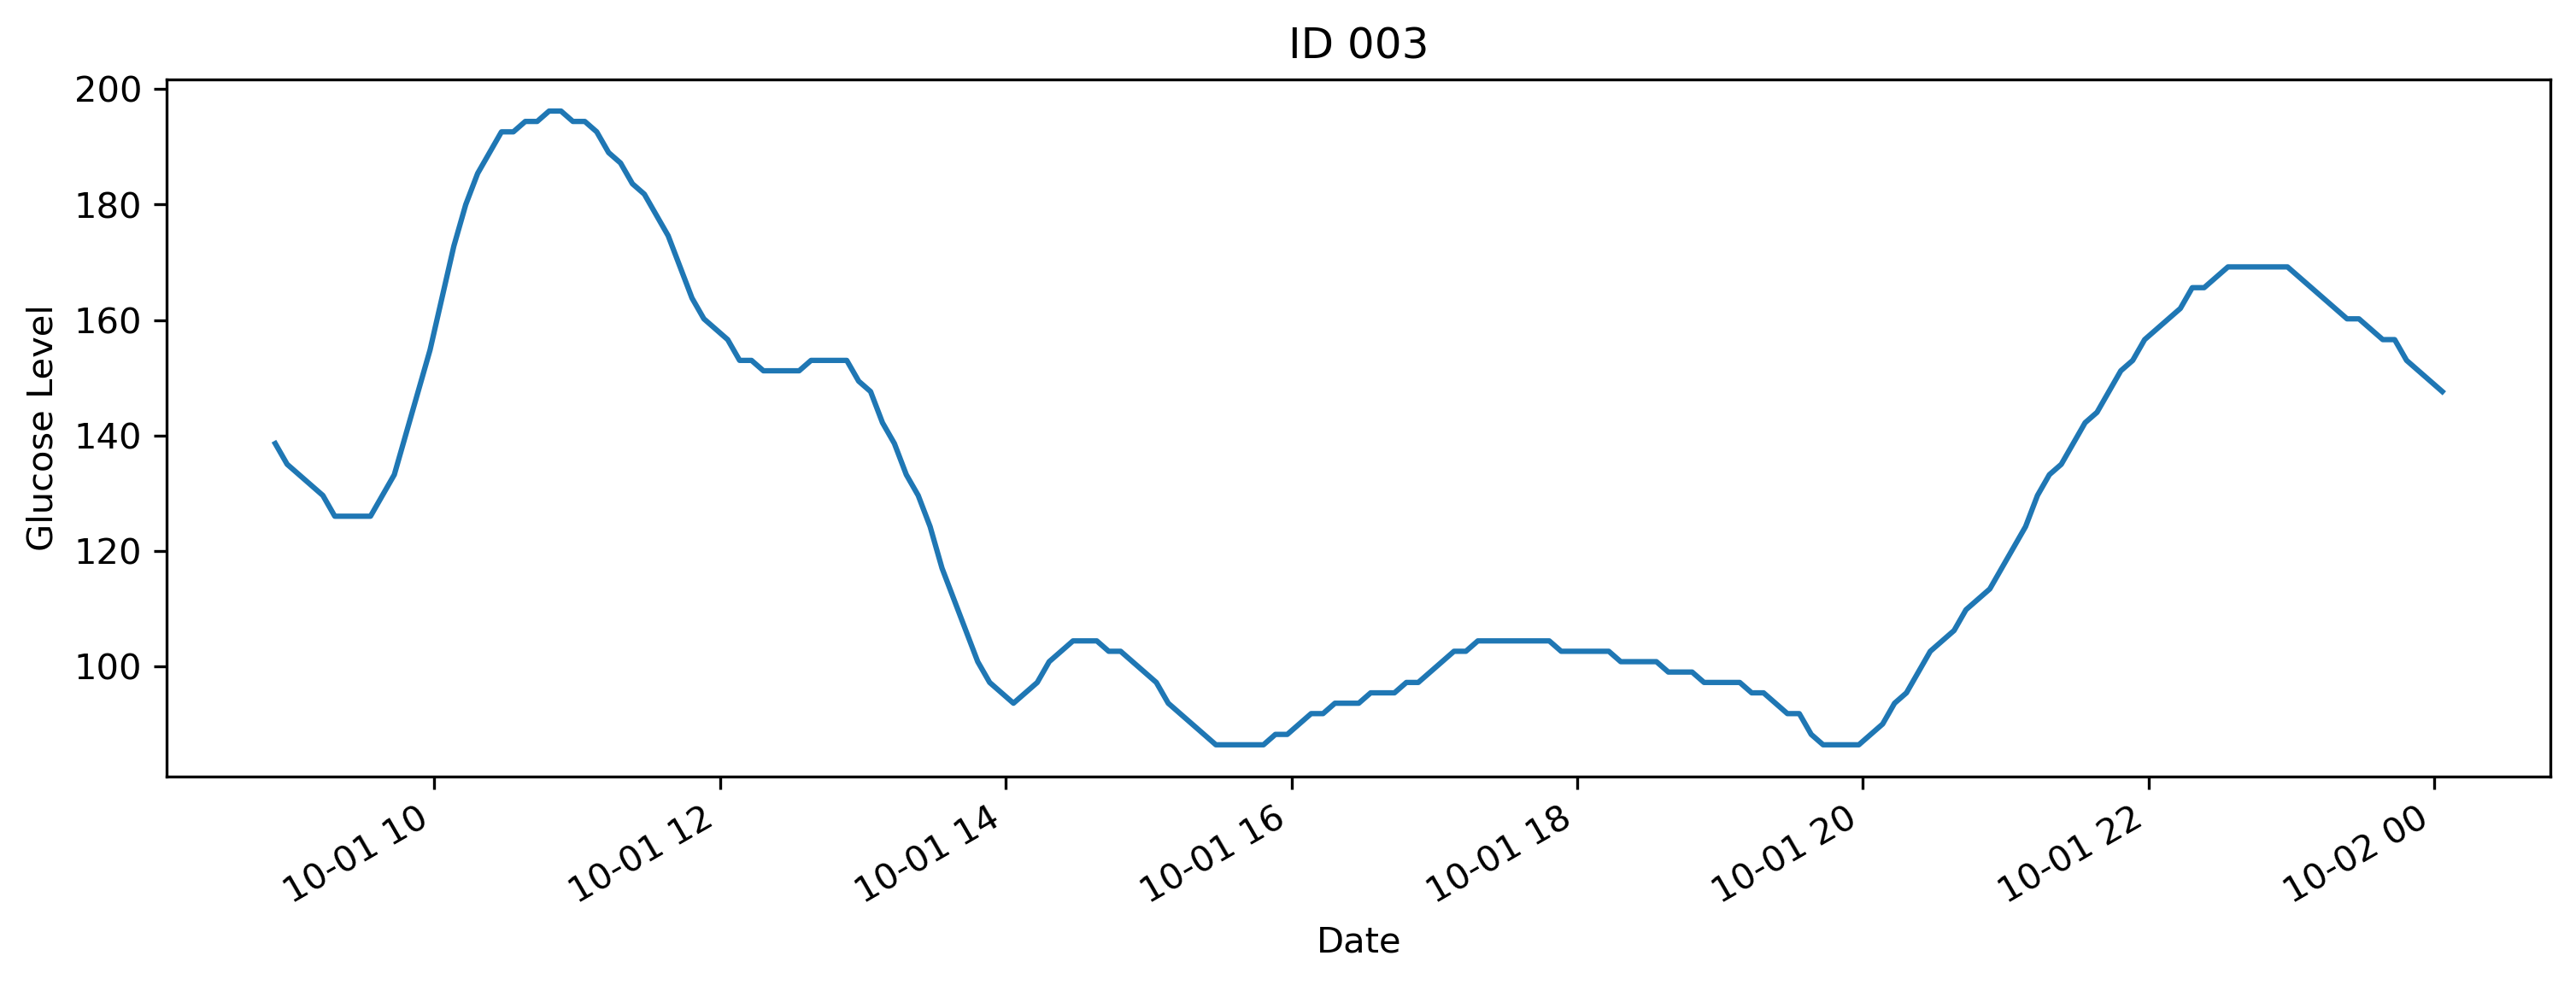

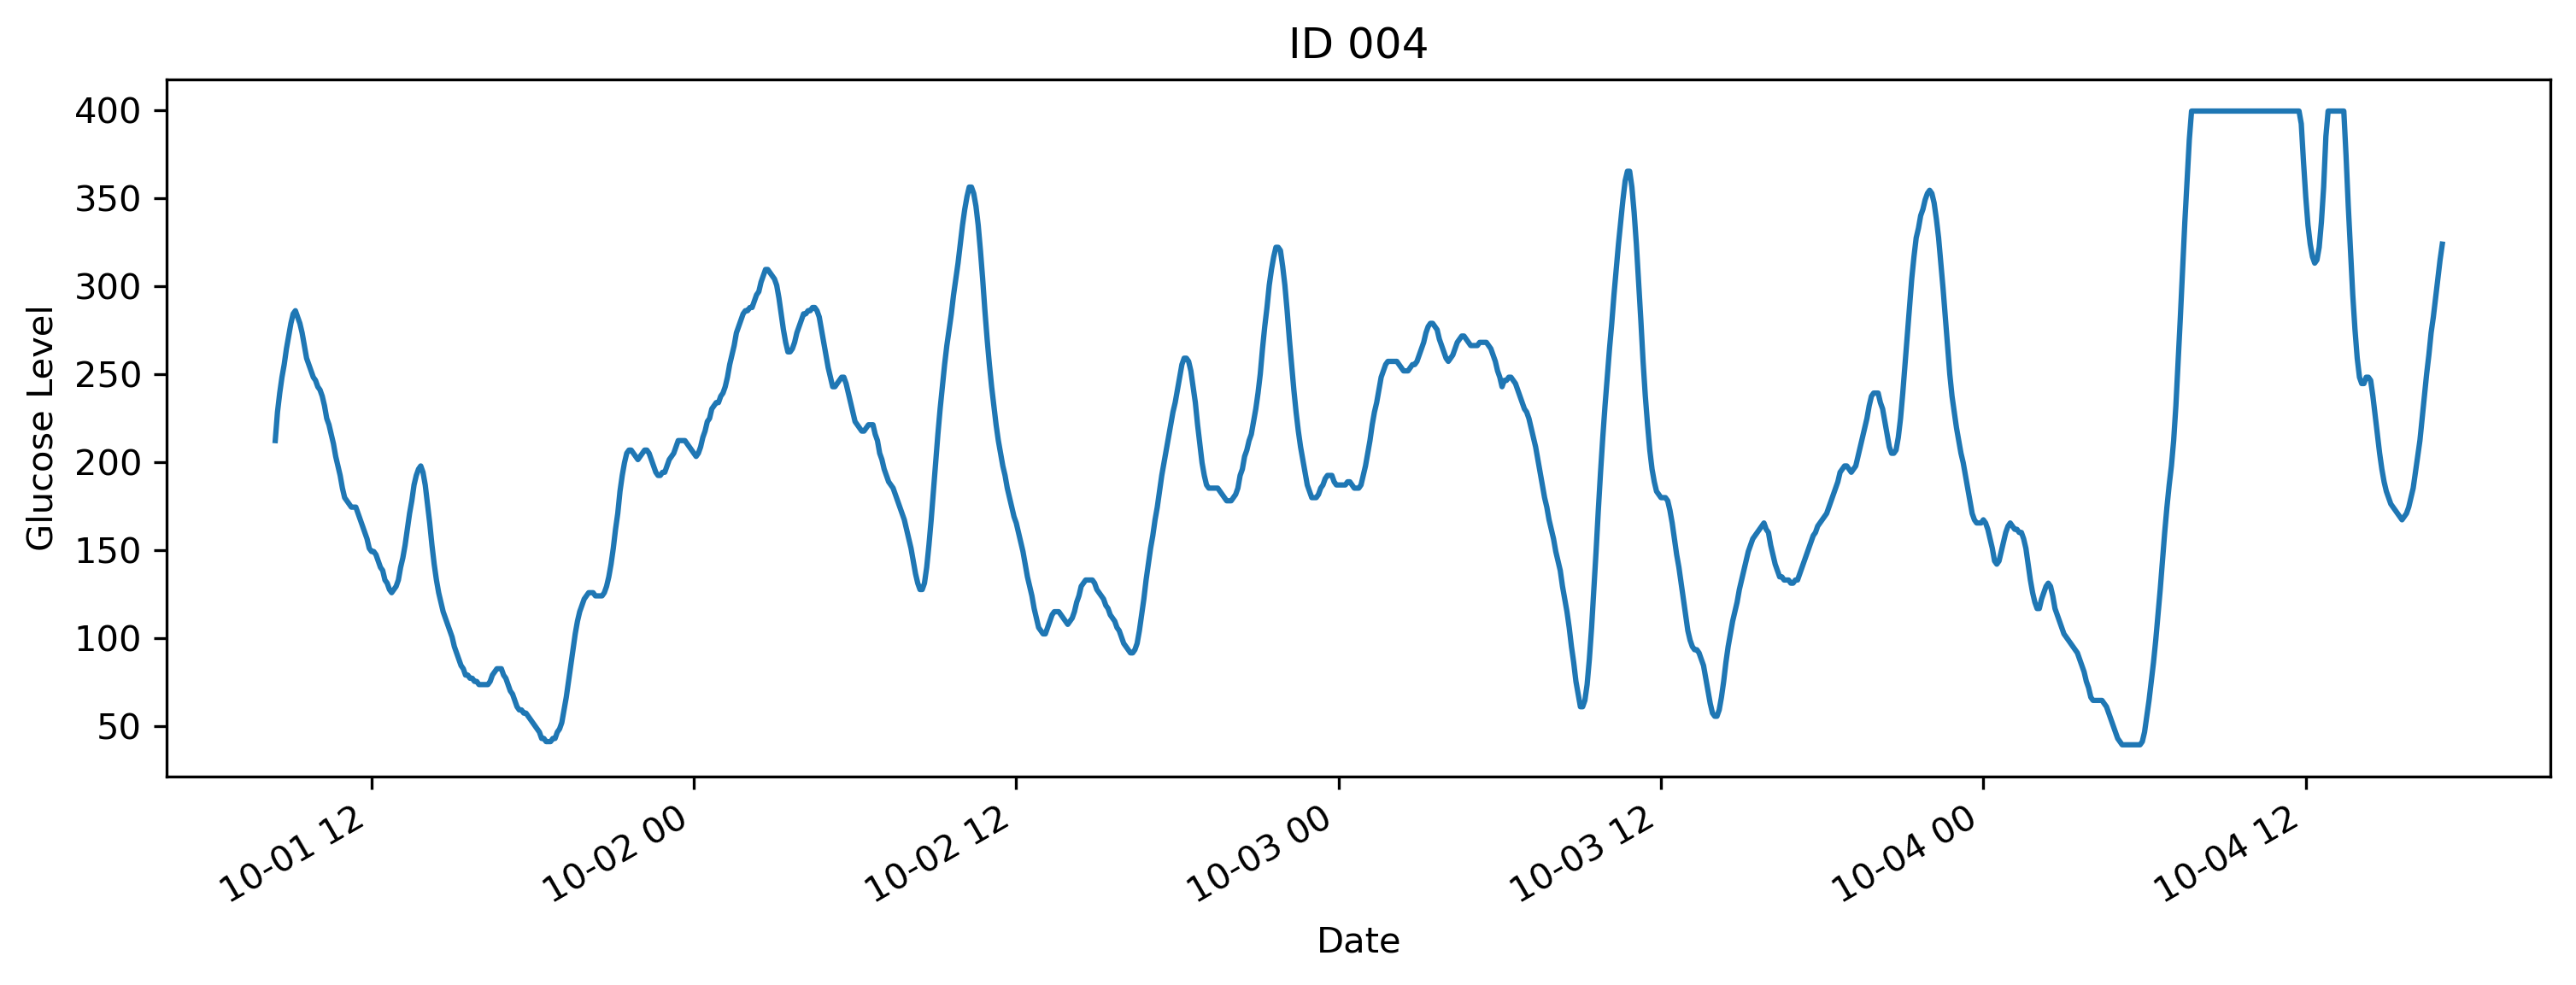

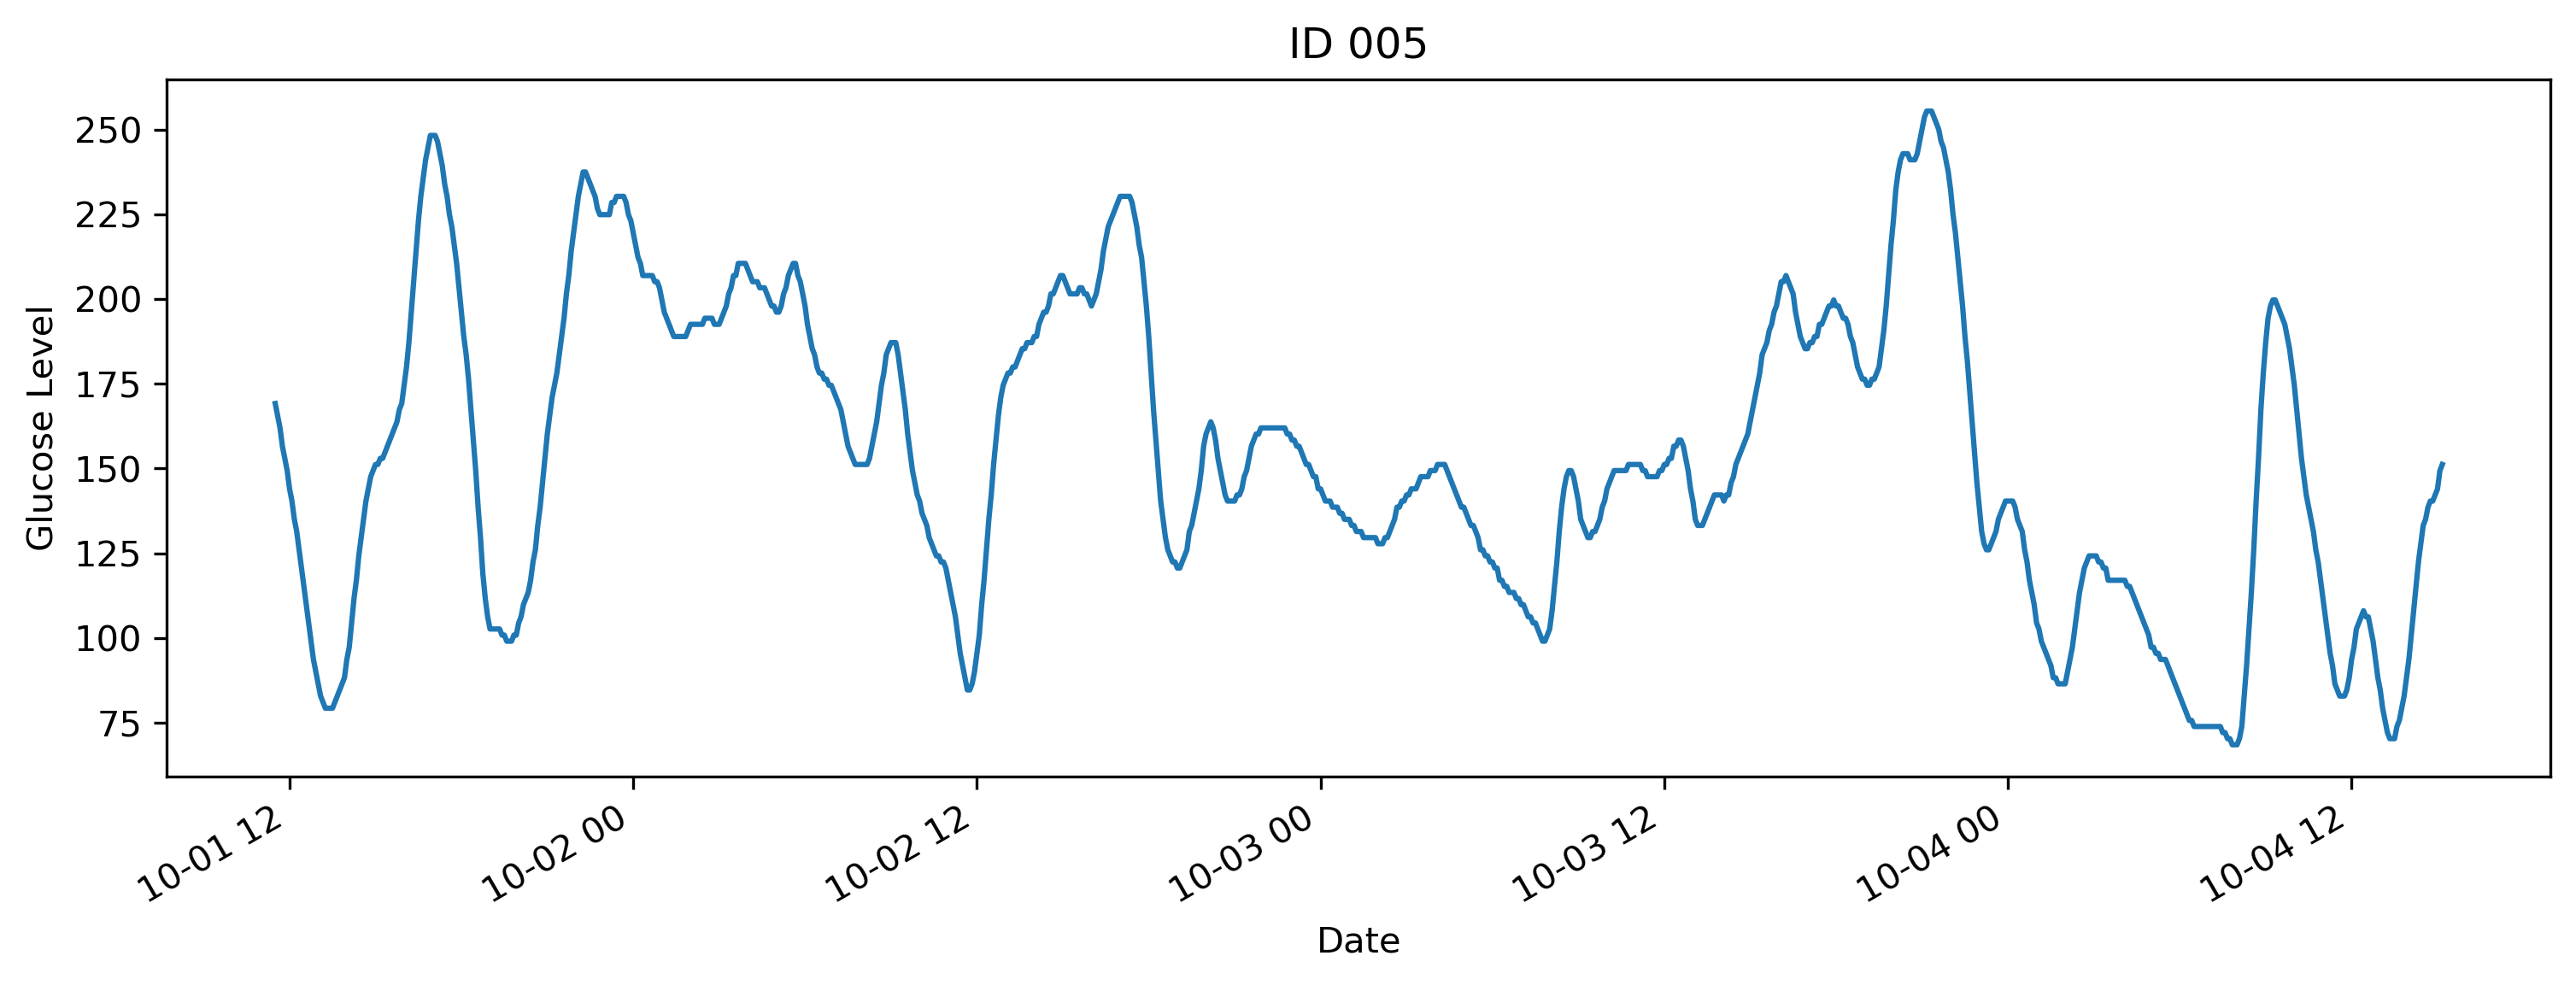

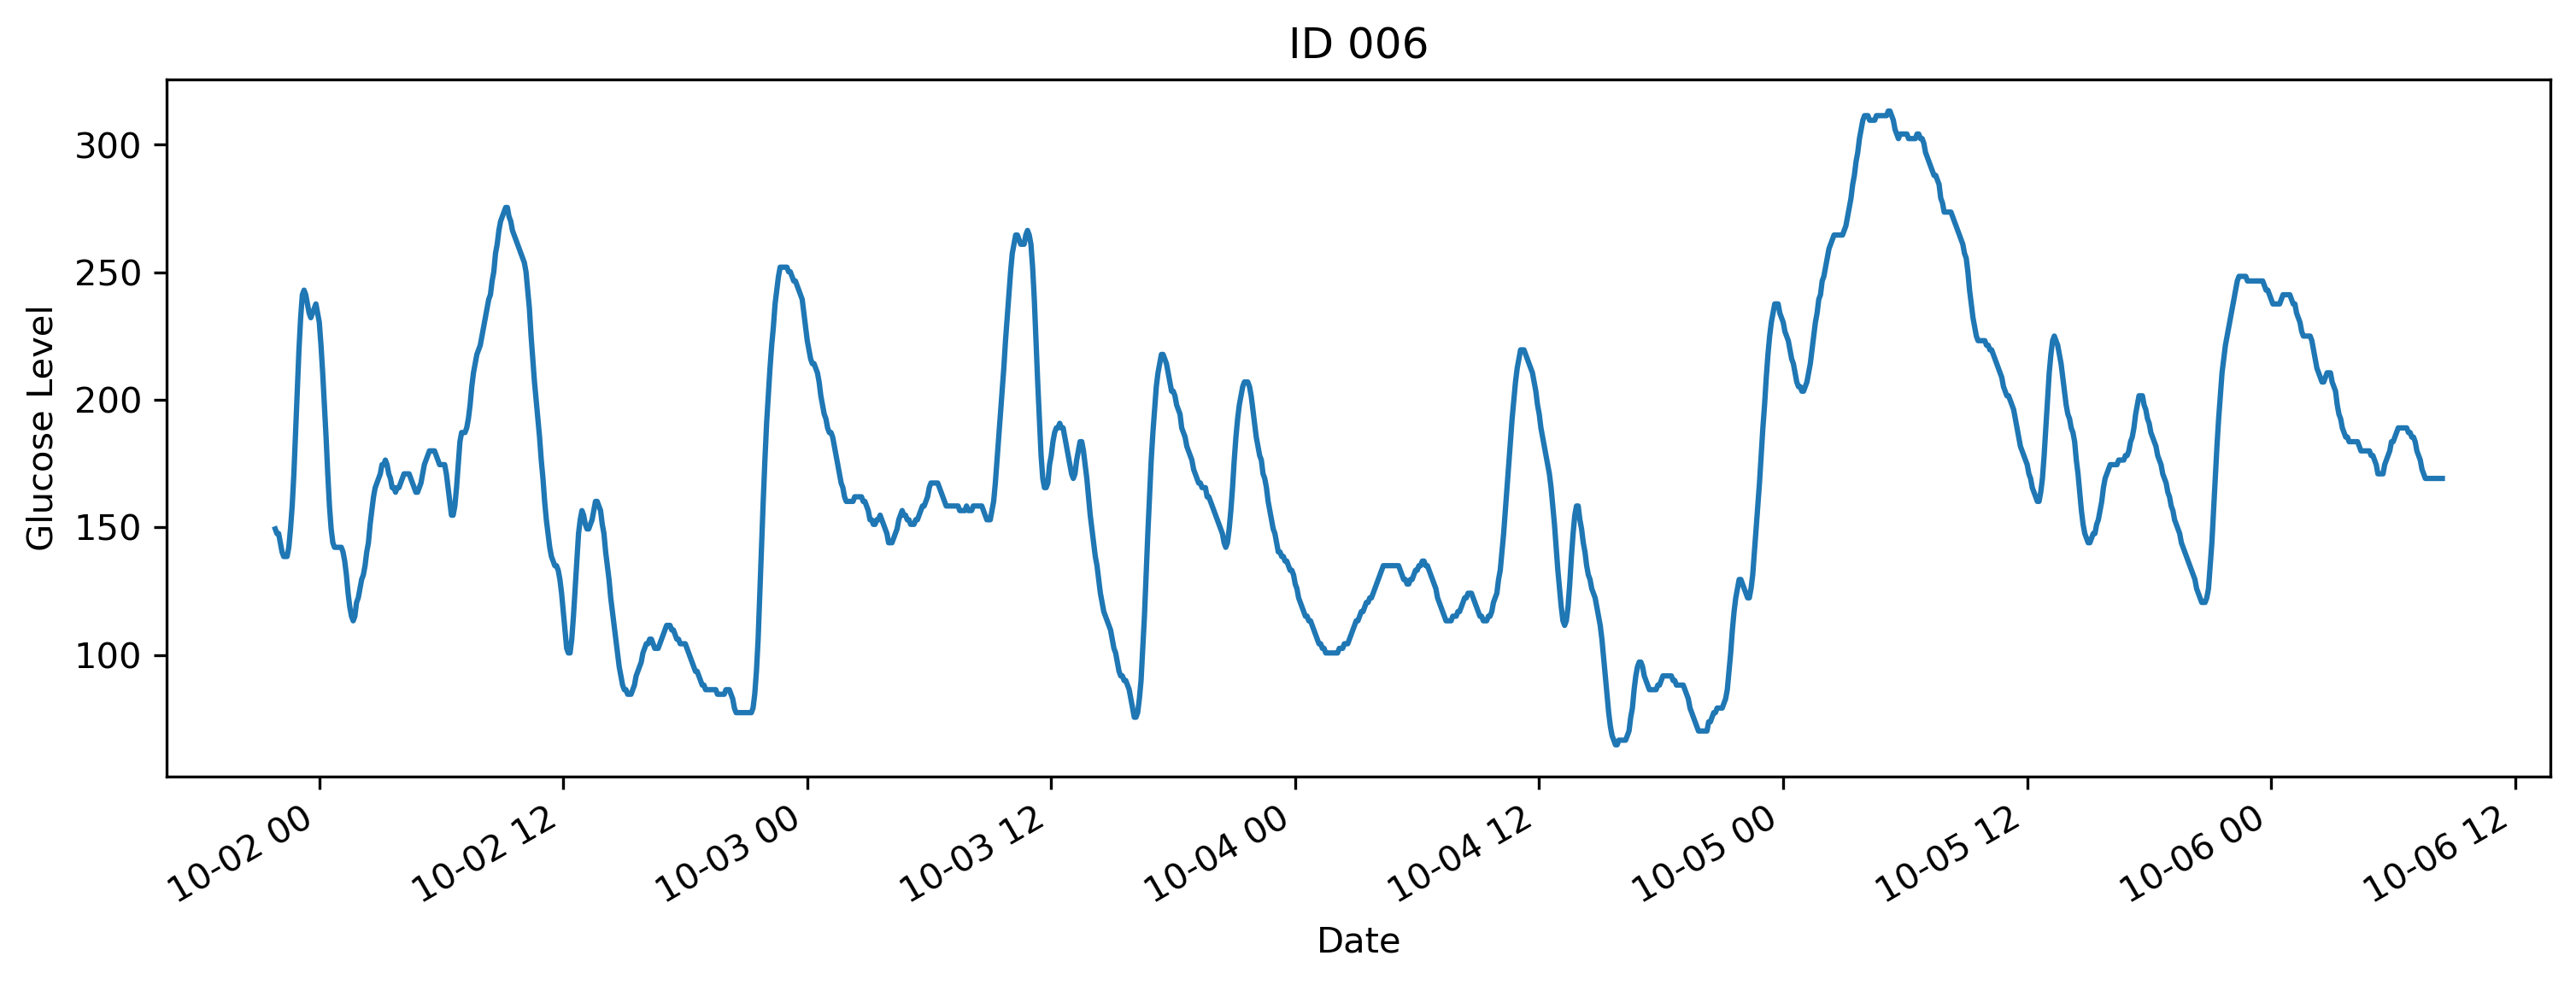

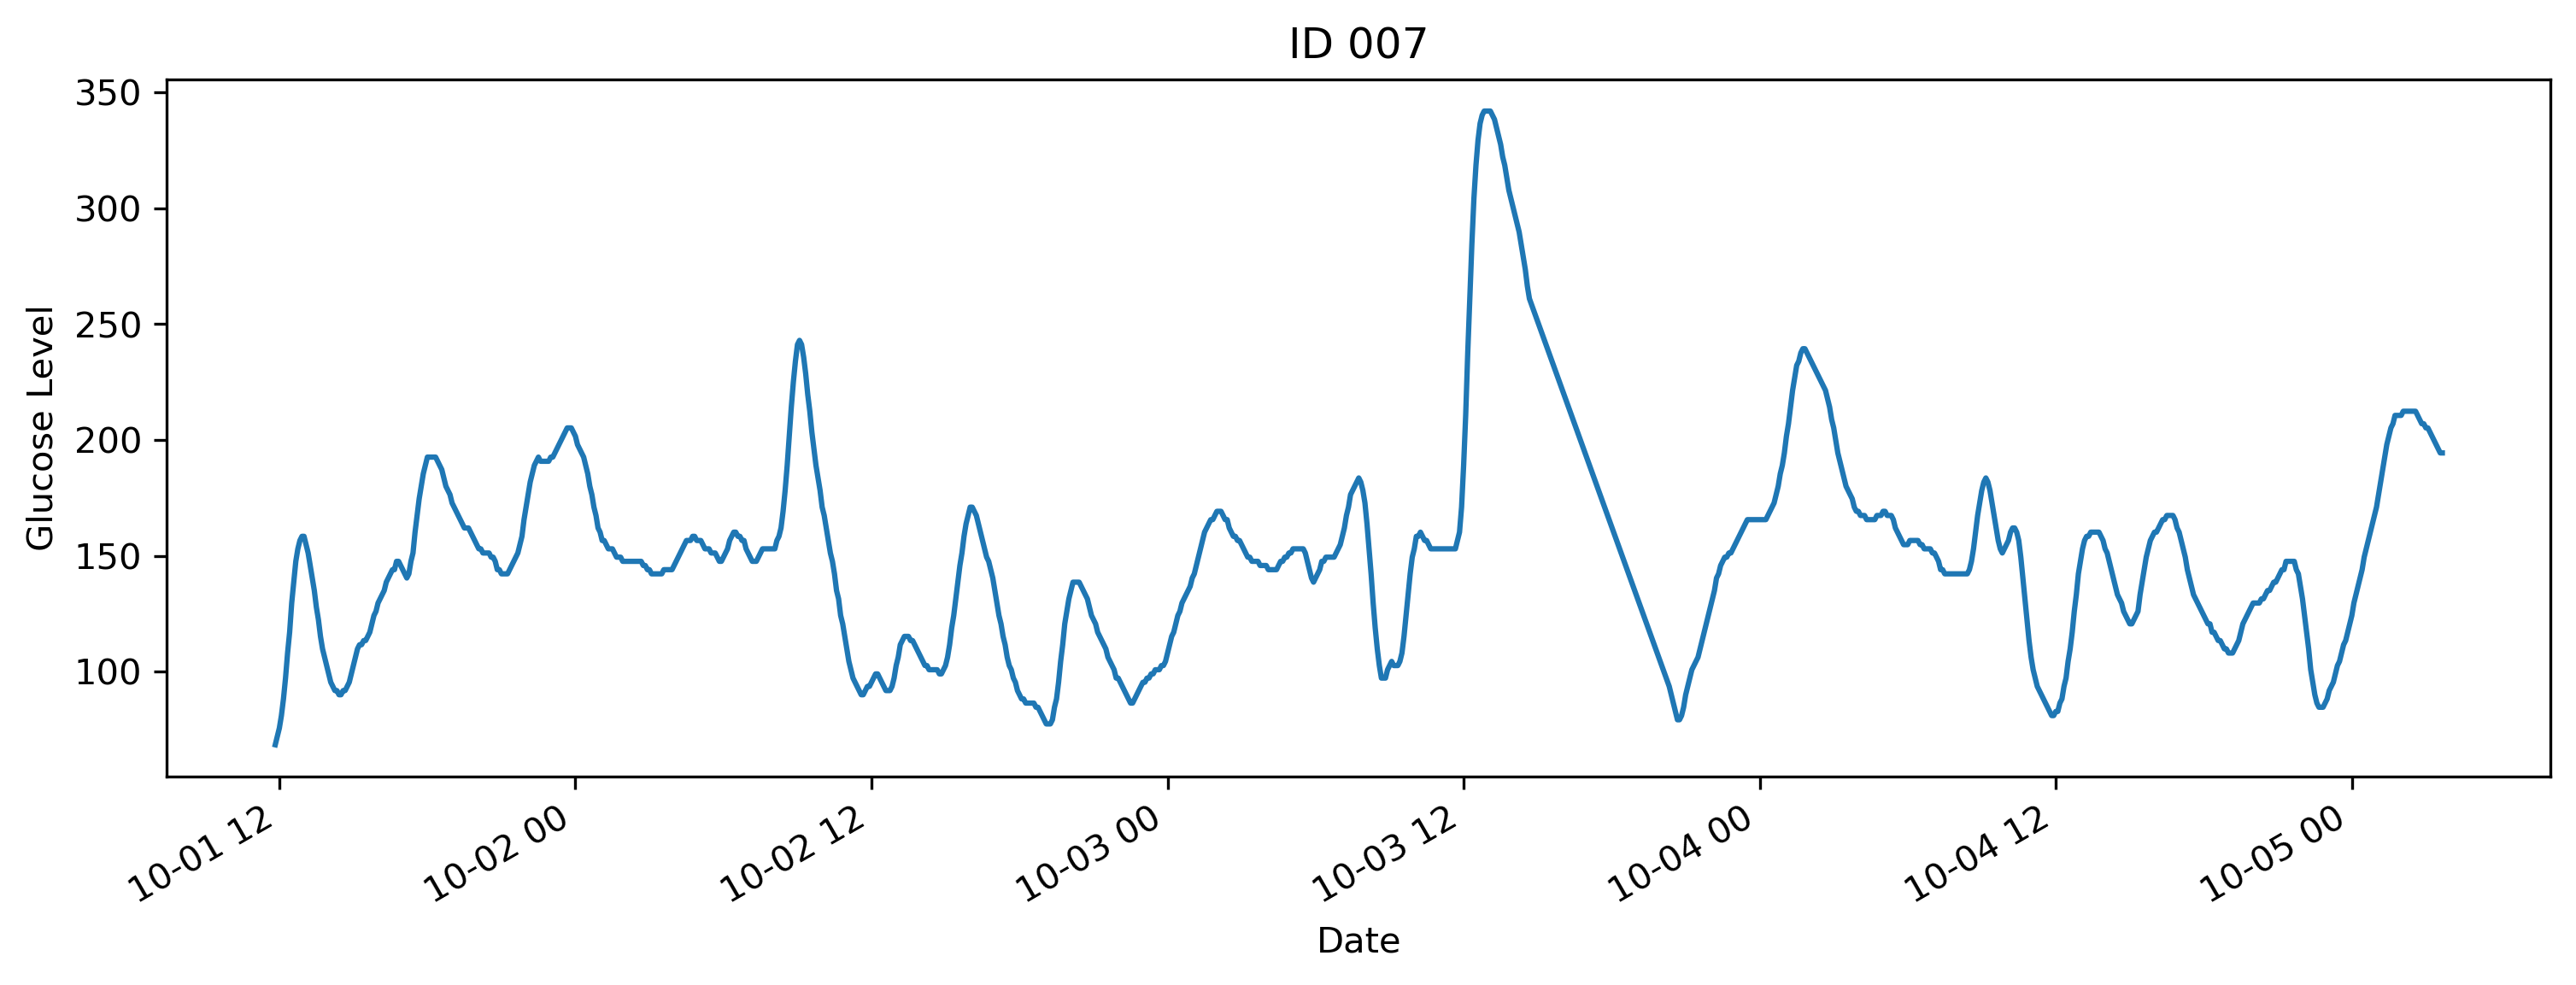

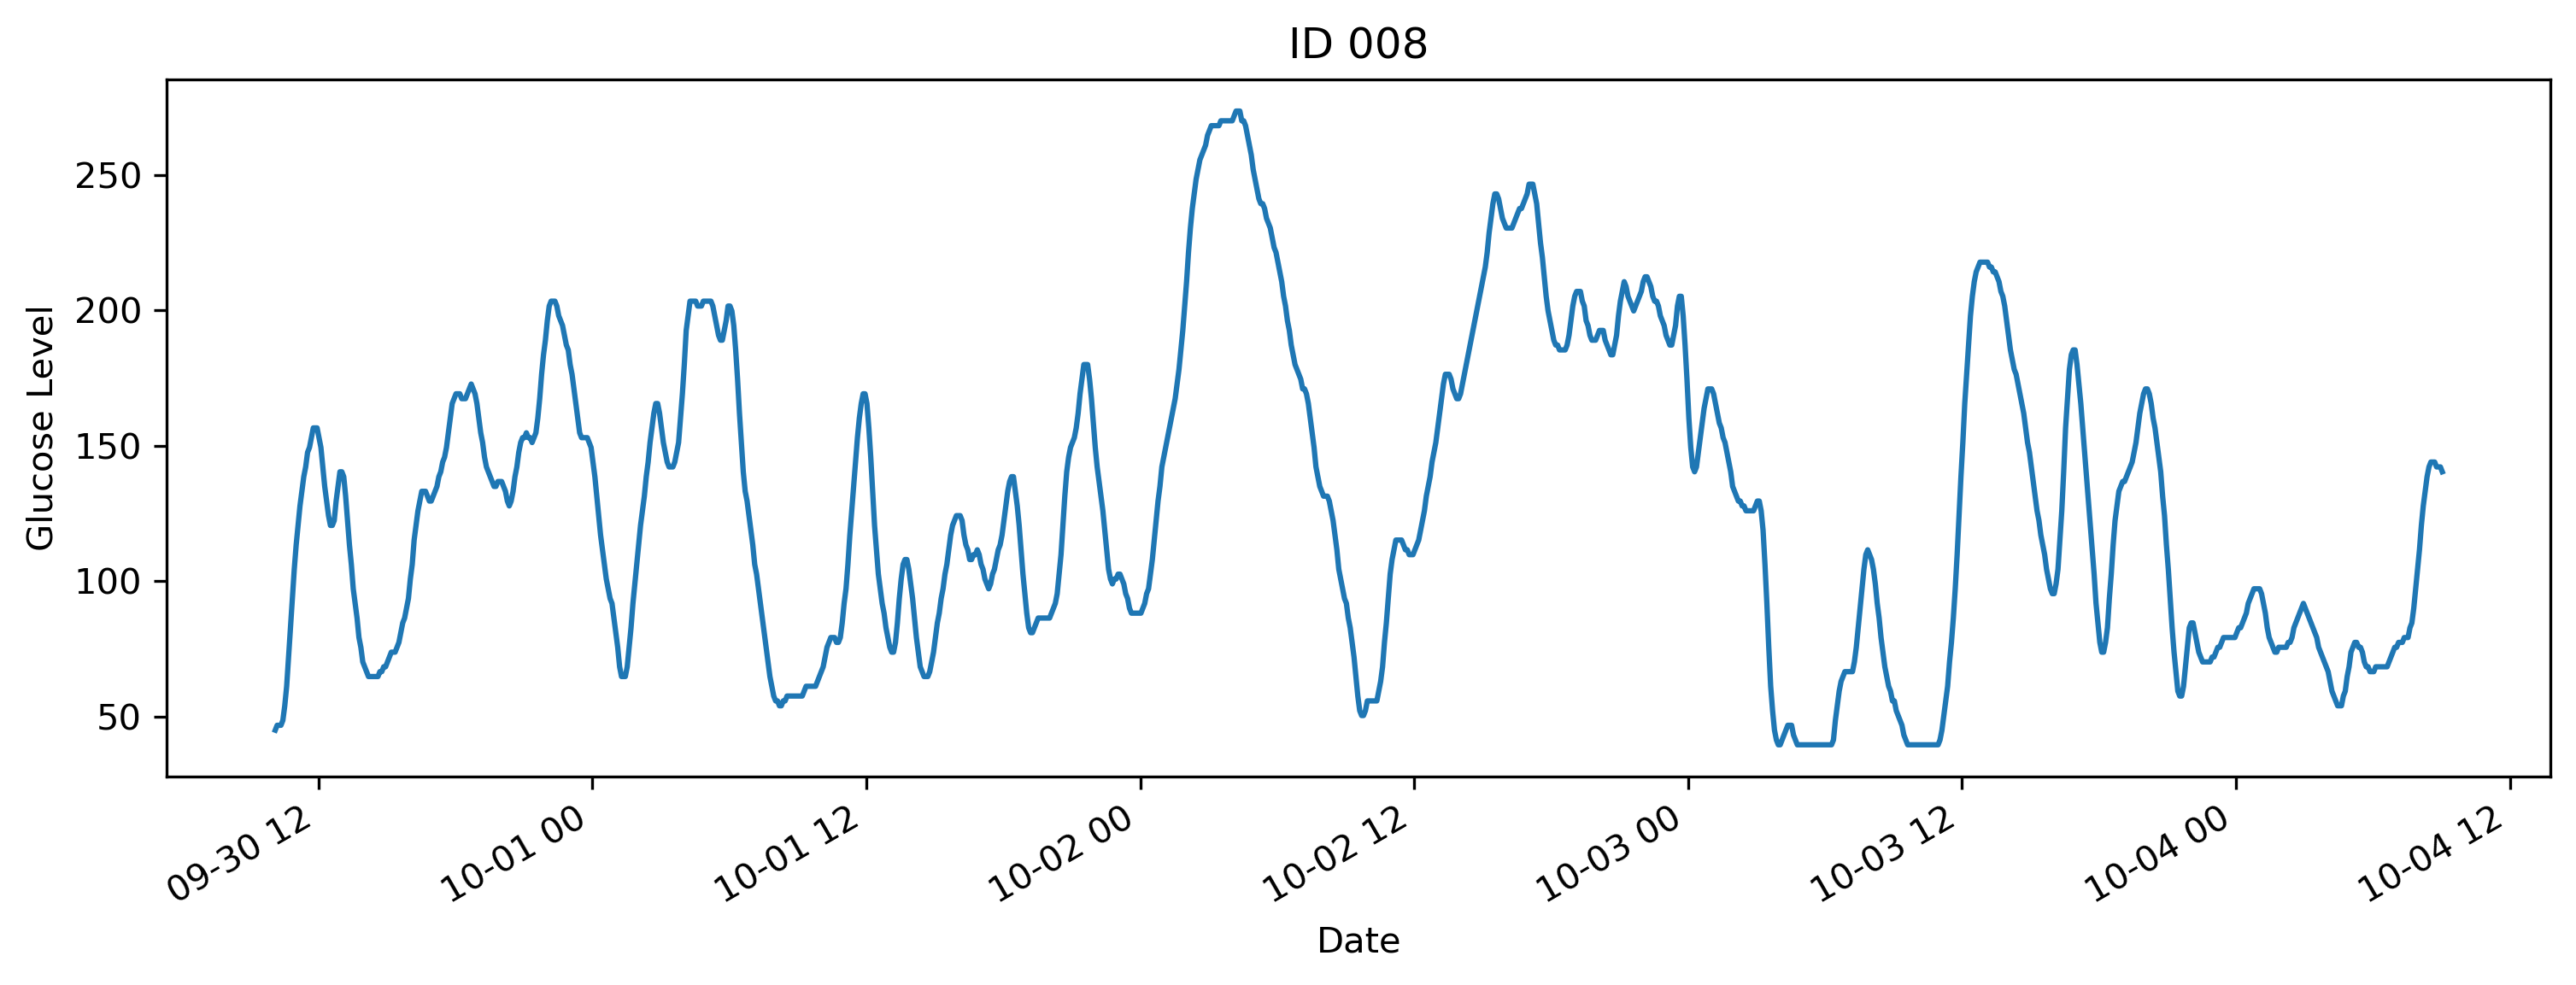

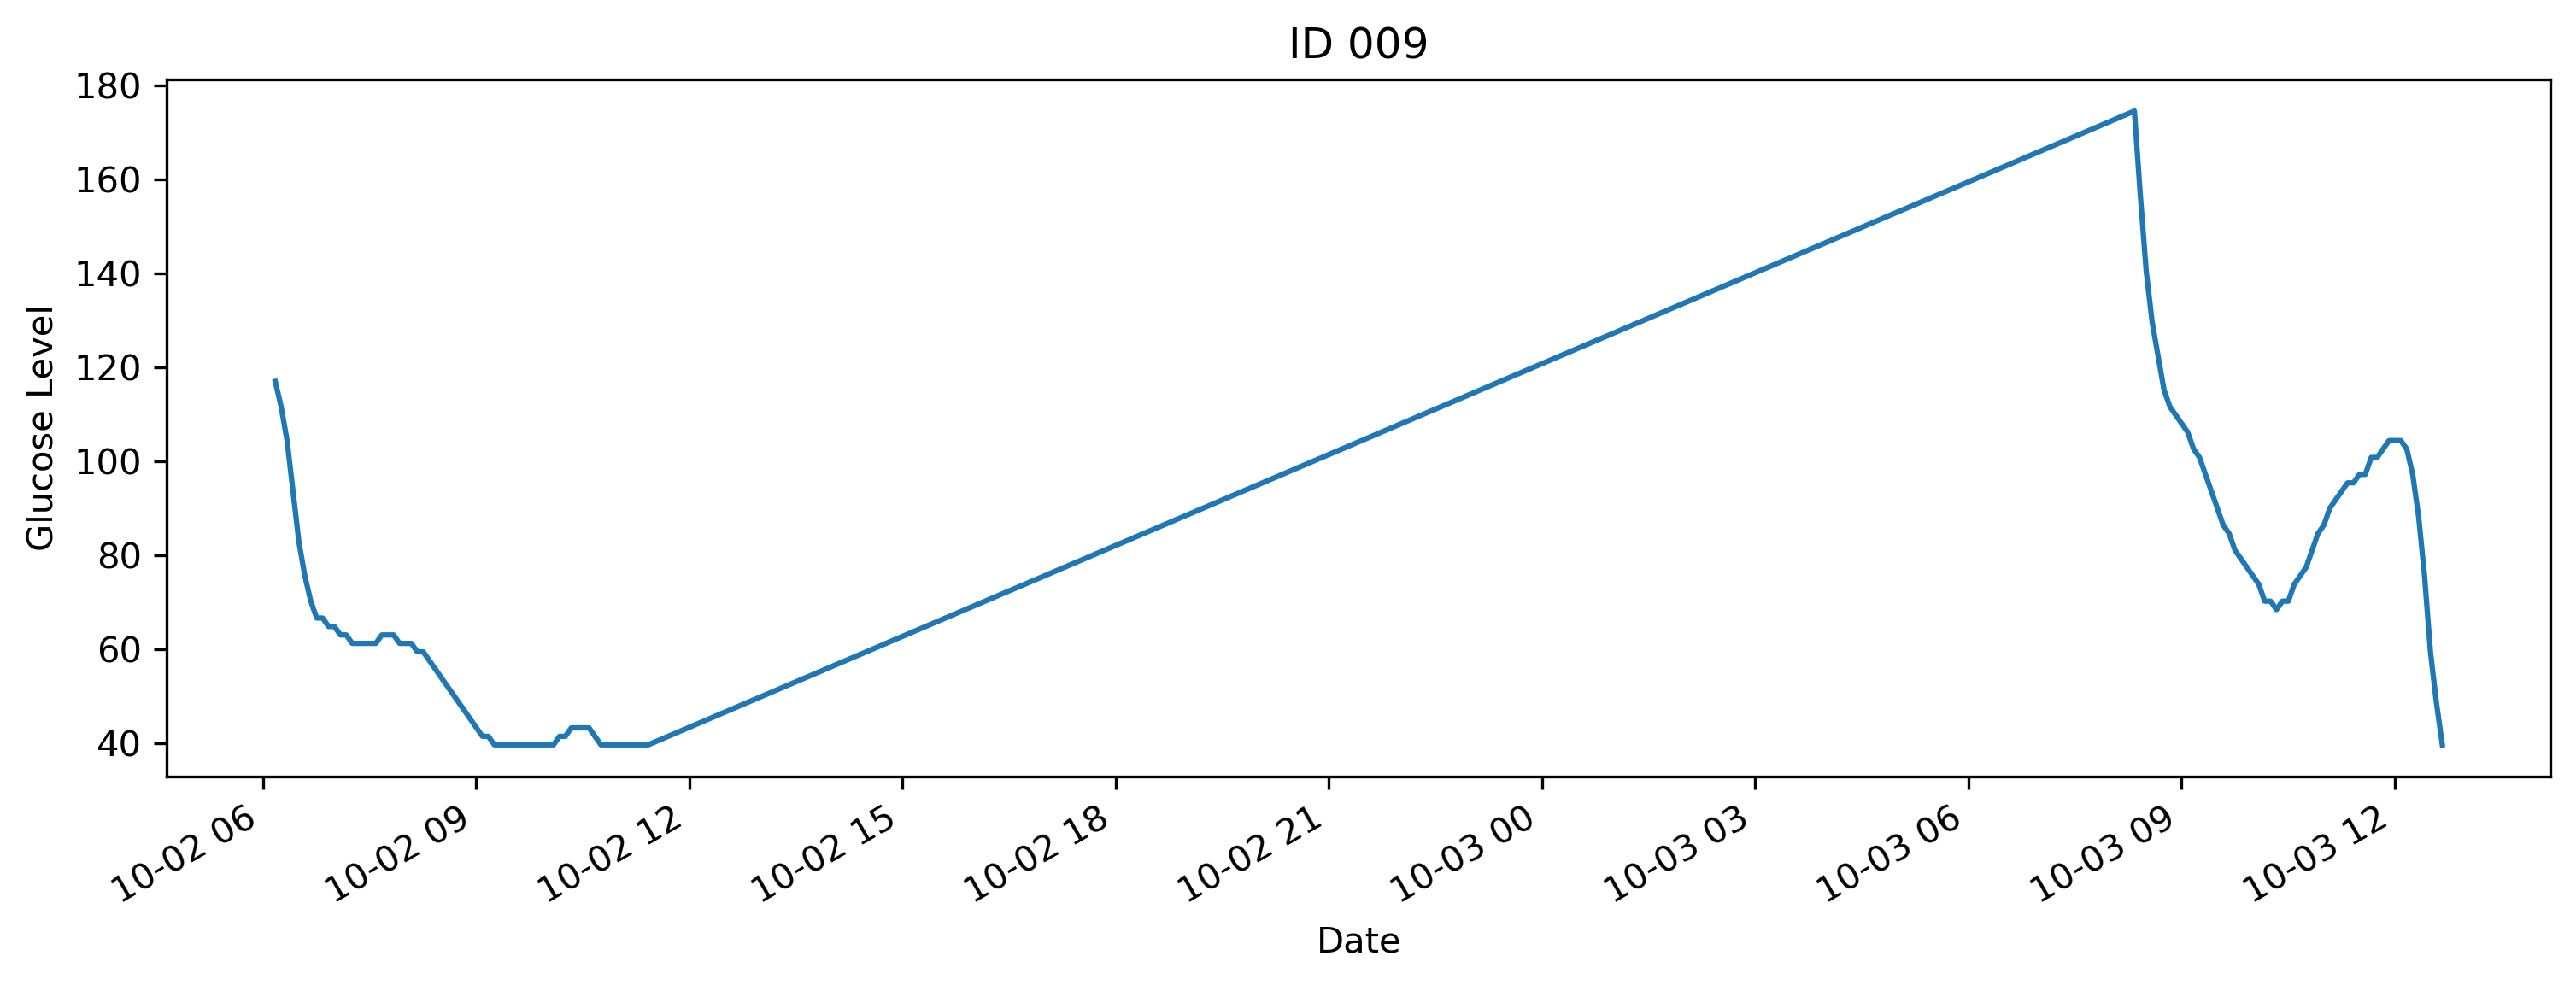

In [42]:
# Plot by ID
for ID in IDs:
    x = subj_data[ID].time # Time for x-axis
    y = subj_data[ID].gl # Glucose for y-axis

    fig, ax = plt.subplots(figsize = (12,4), dpi = 300)
    ax.plot(x, y)
    plt.title("ID " + ID)
    plt.xlabel("Date")
    plt.ylabel("Glucose Level")
    
    fig.autofmt_xdate() # slant x-axis
    plt.show()

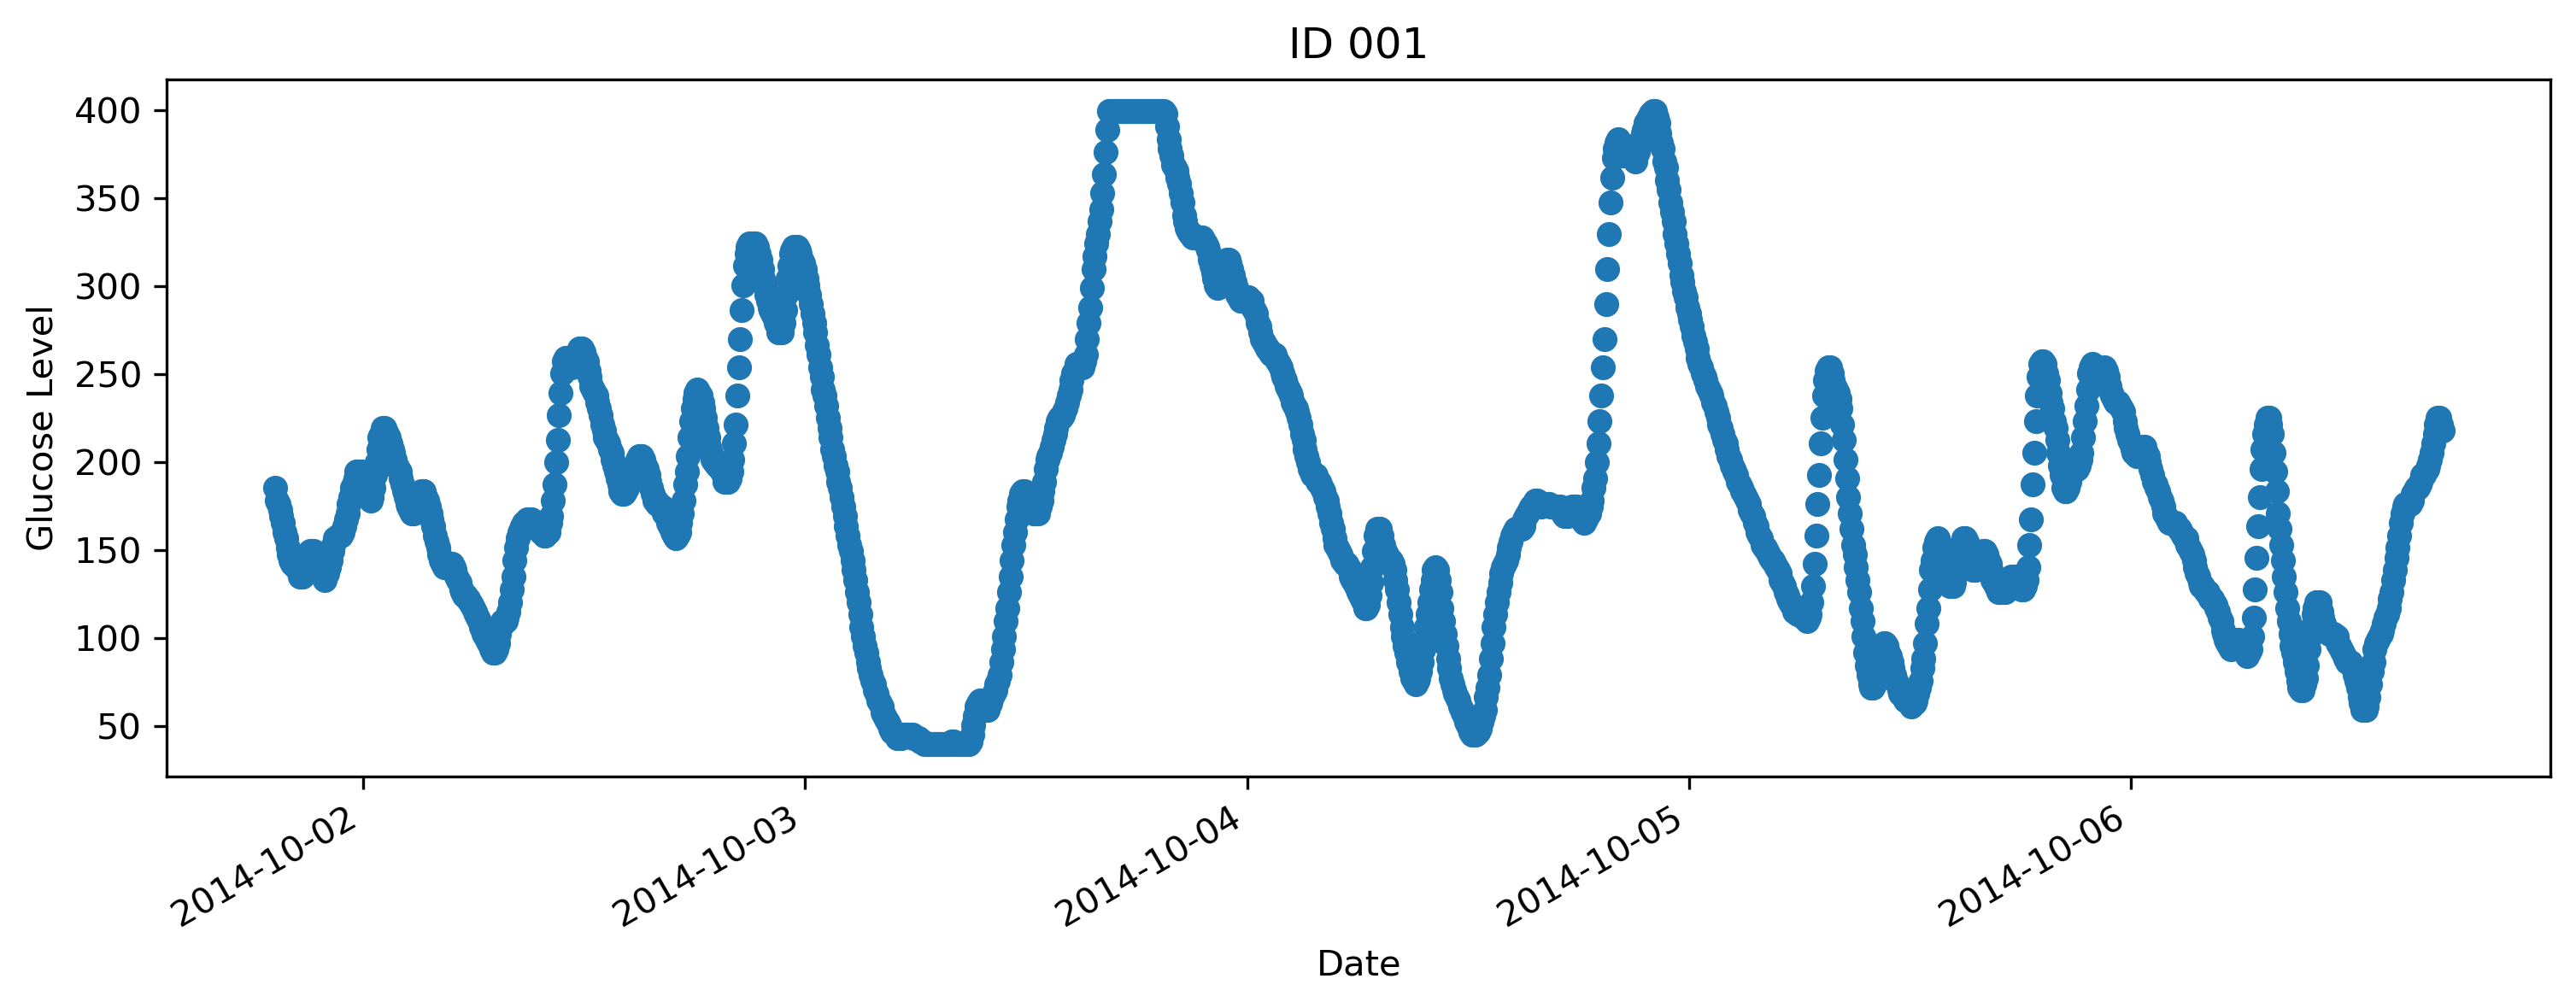

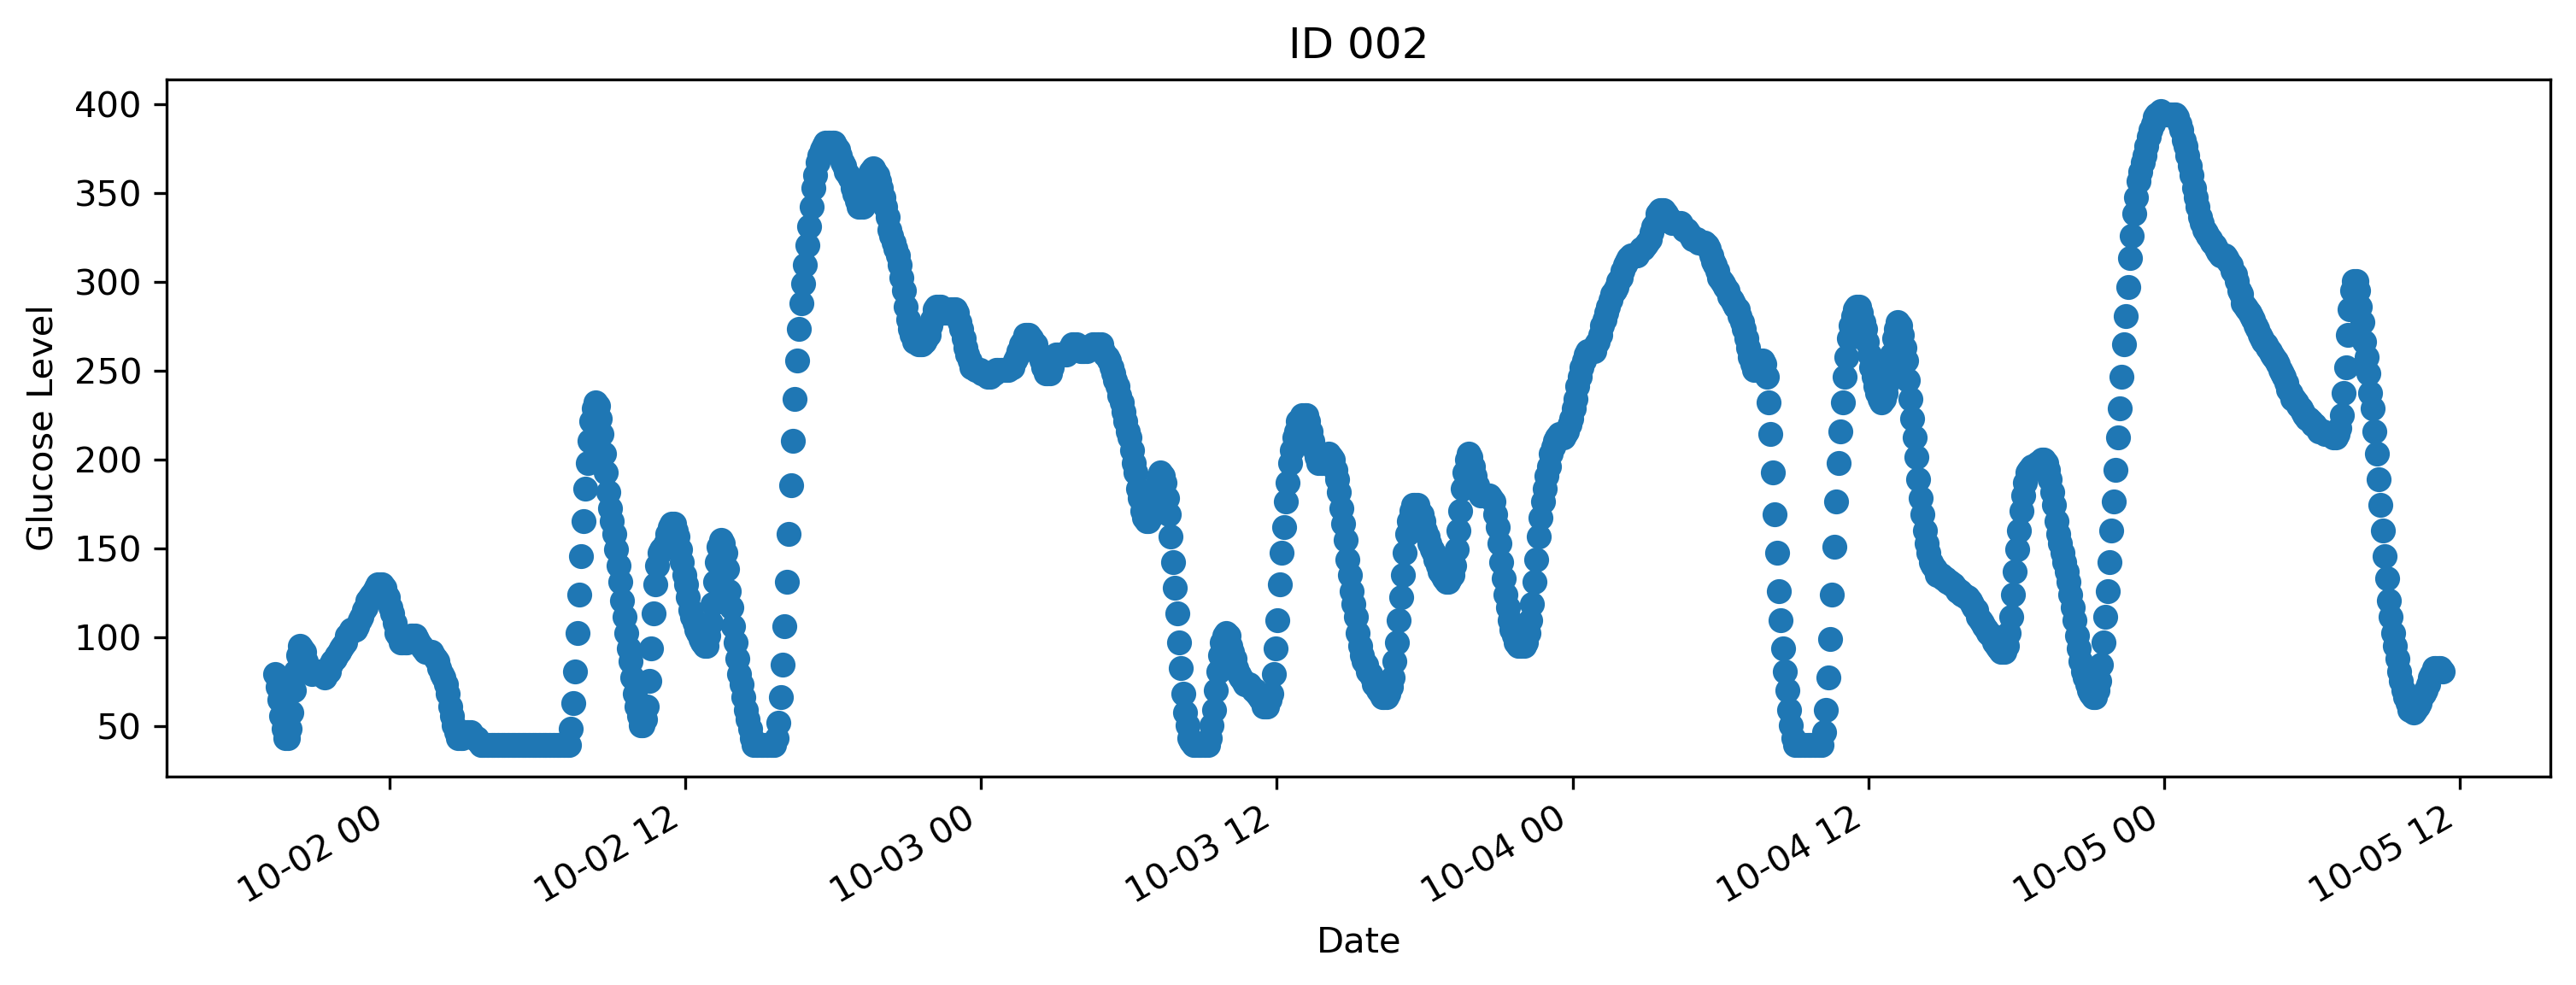

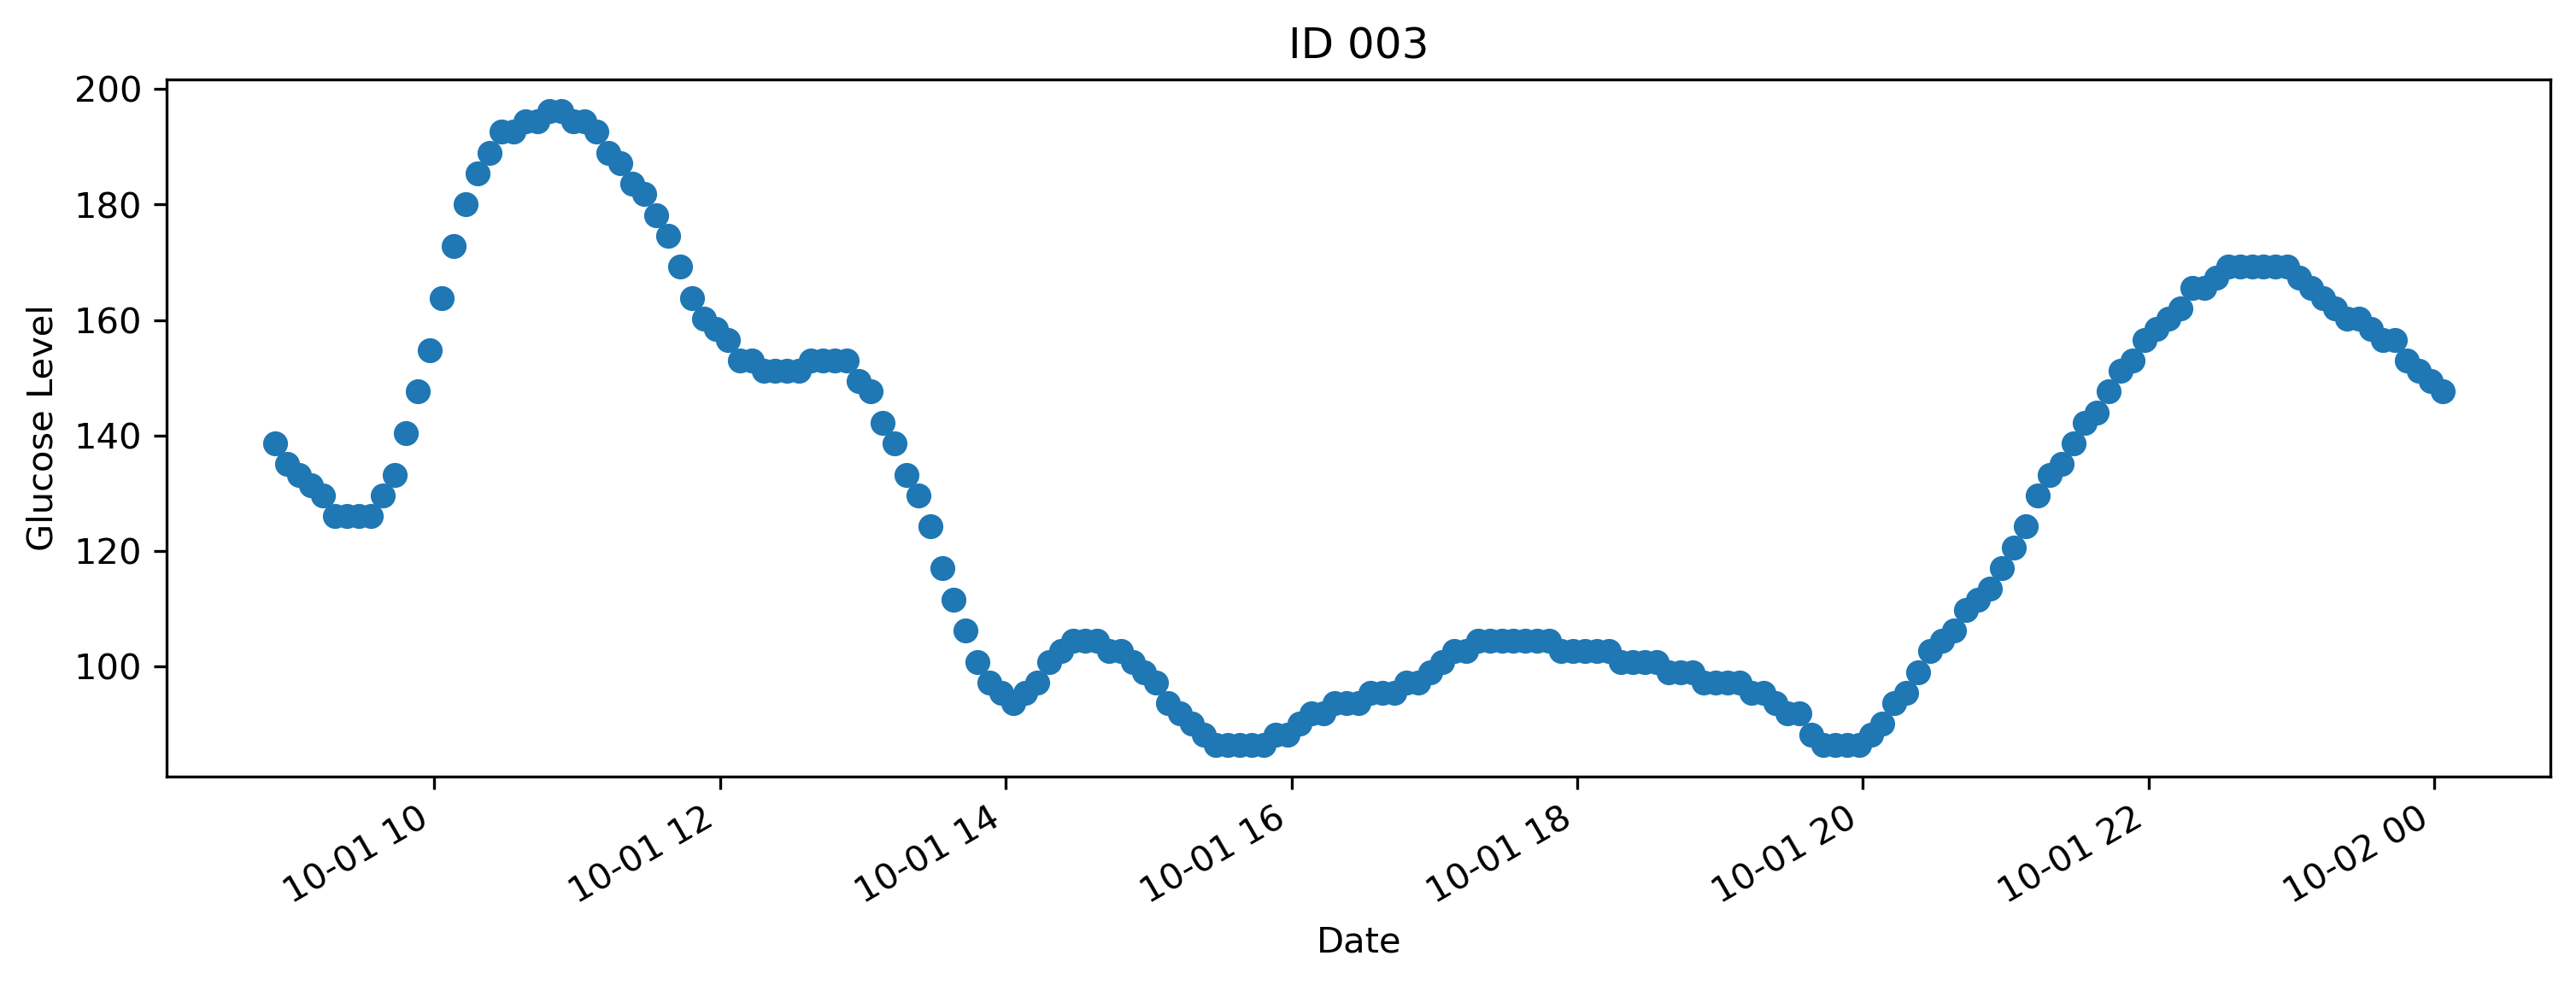

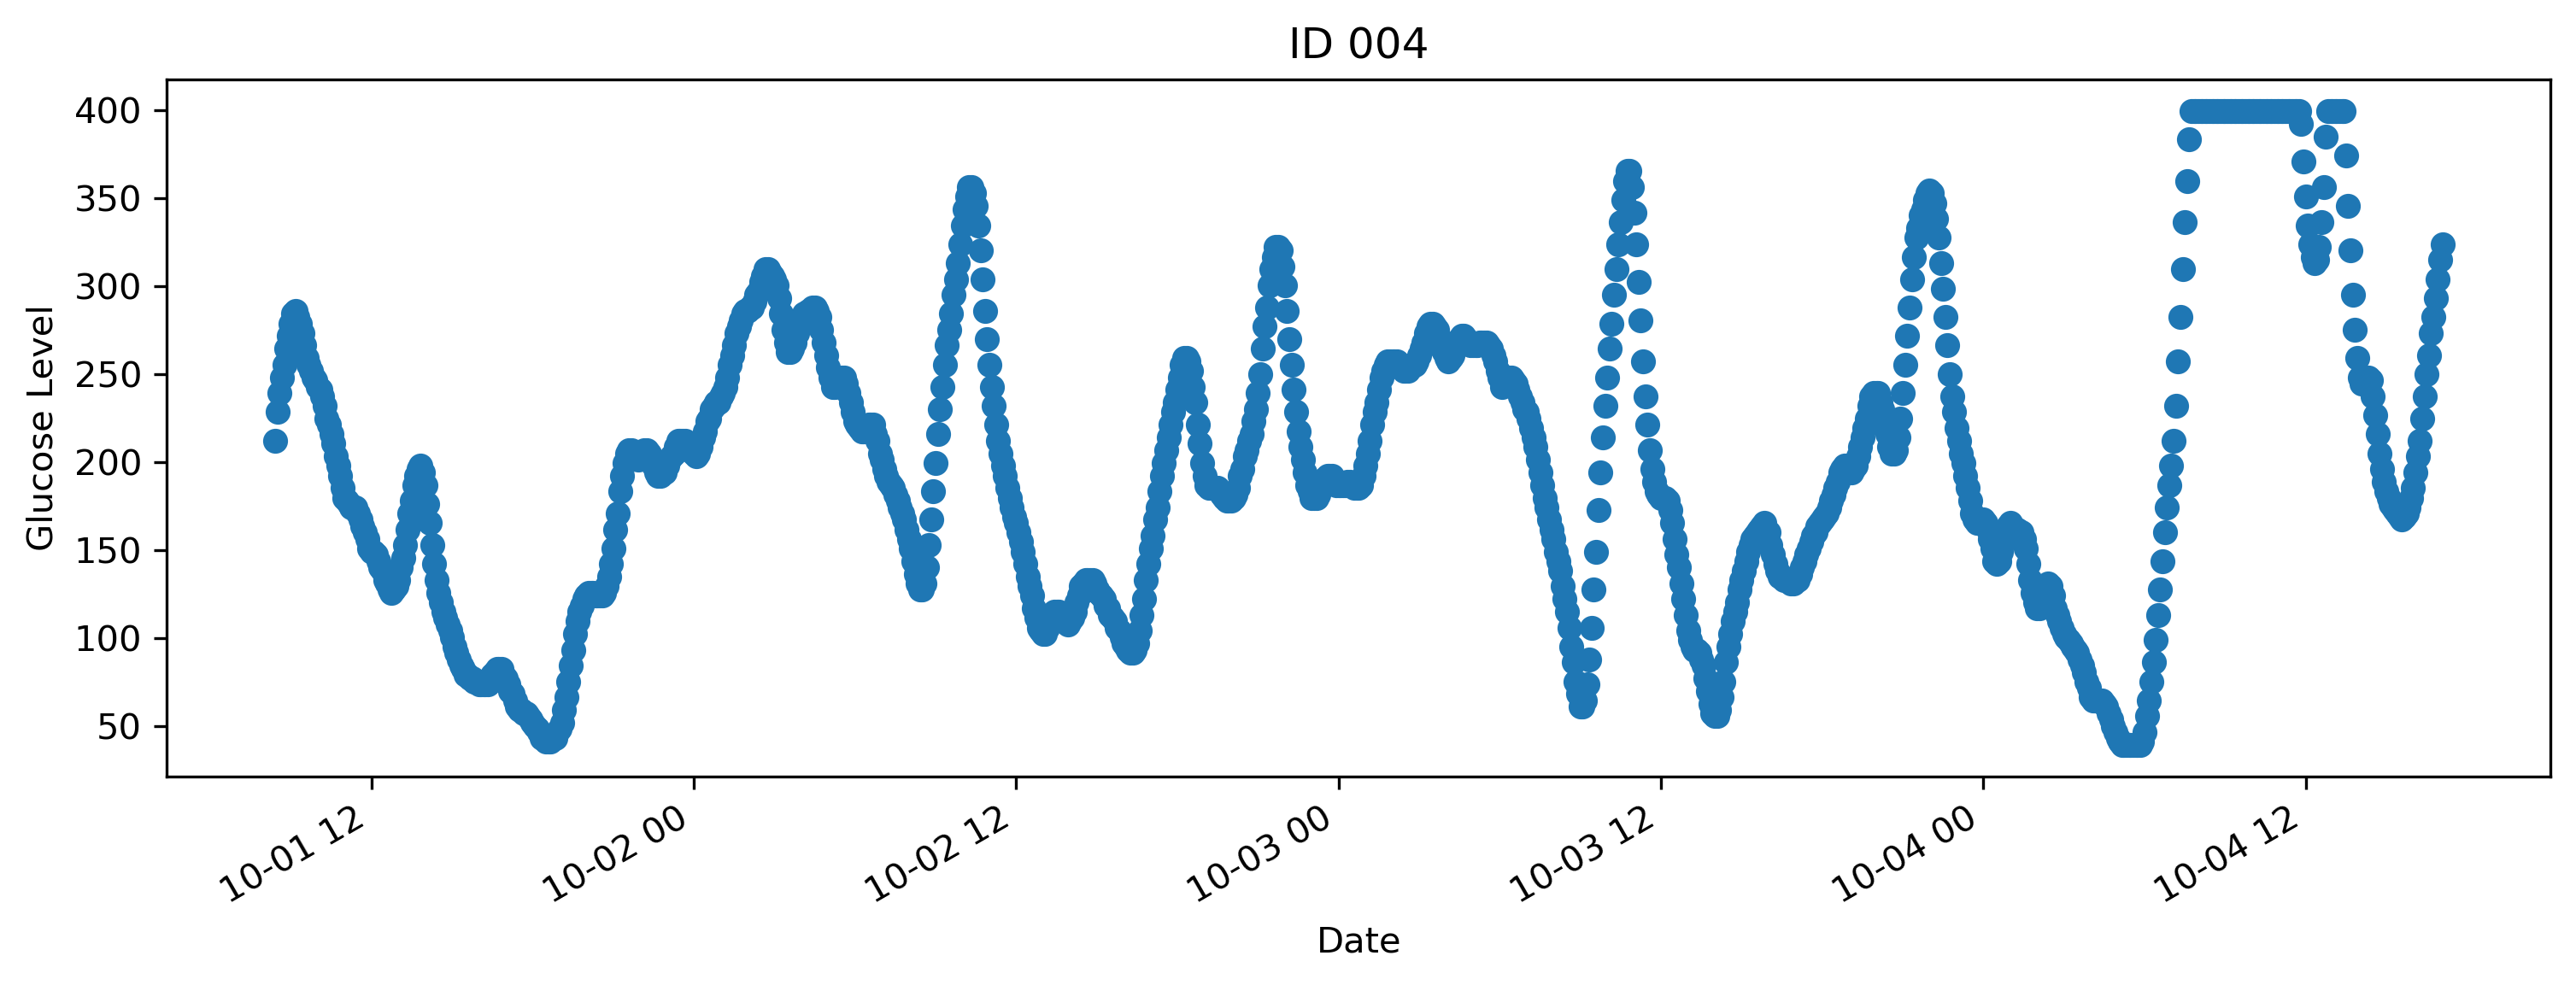

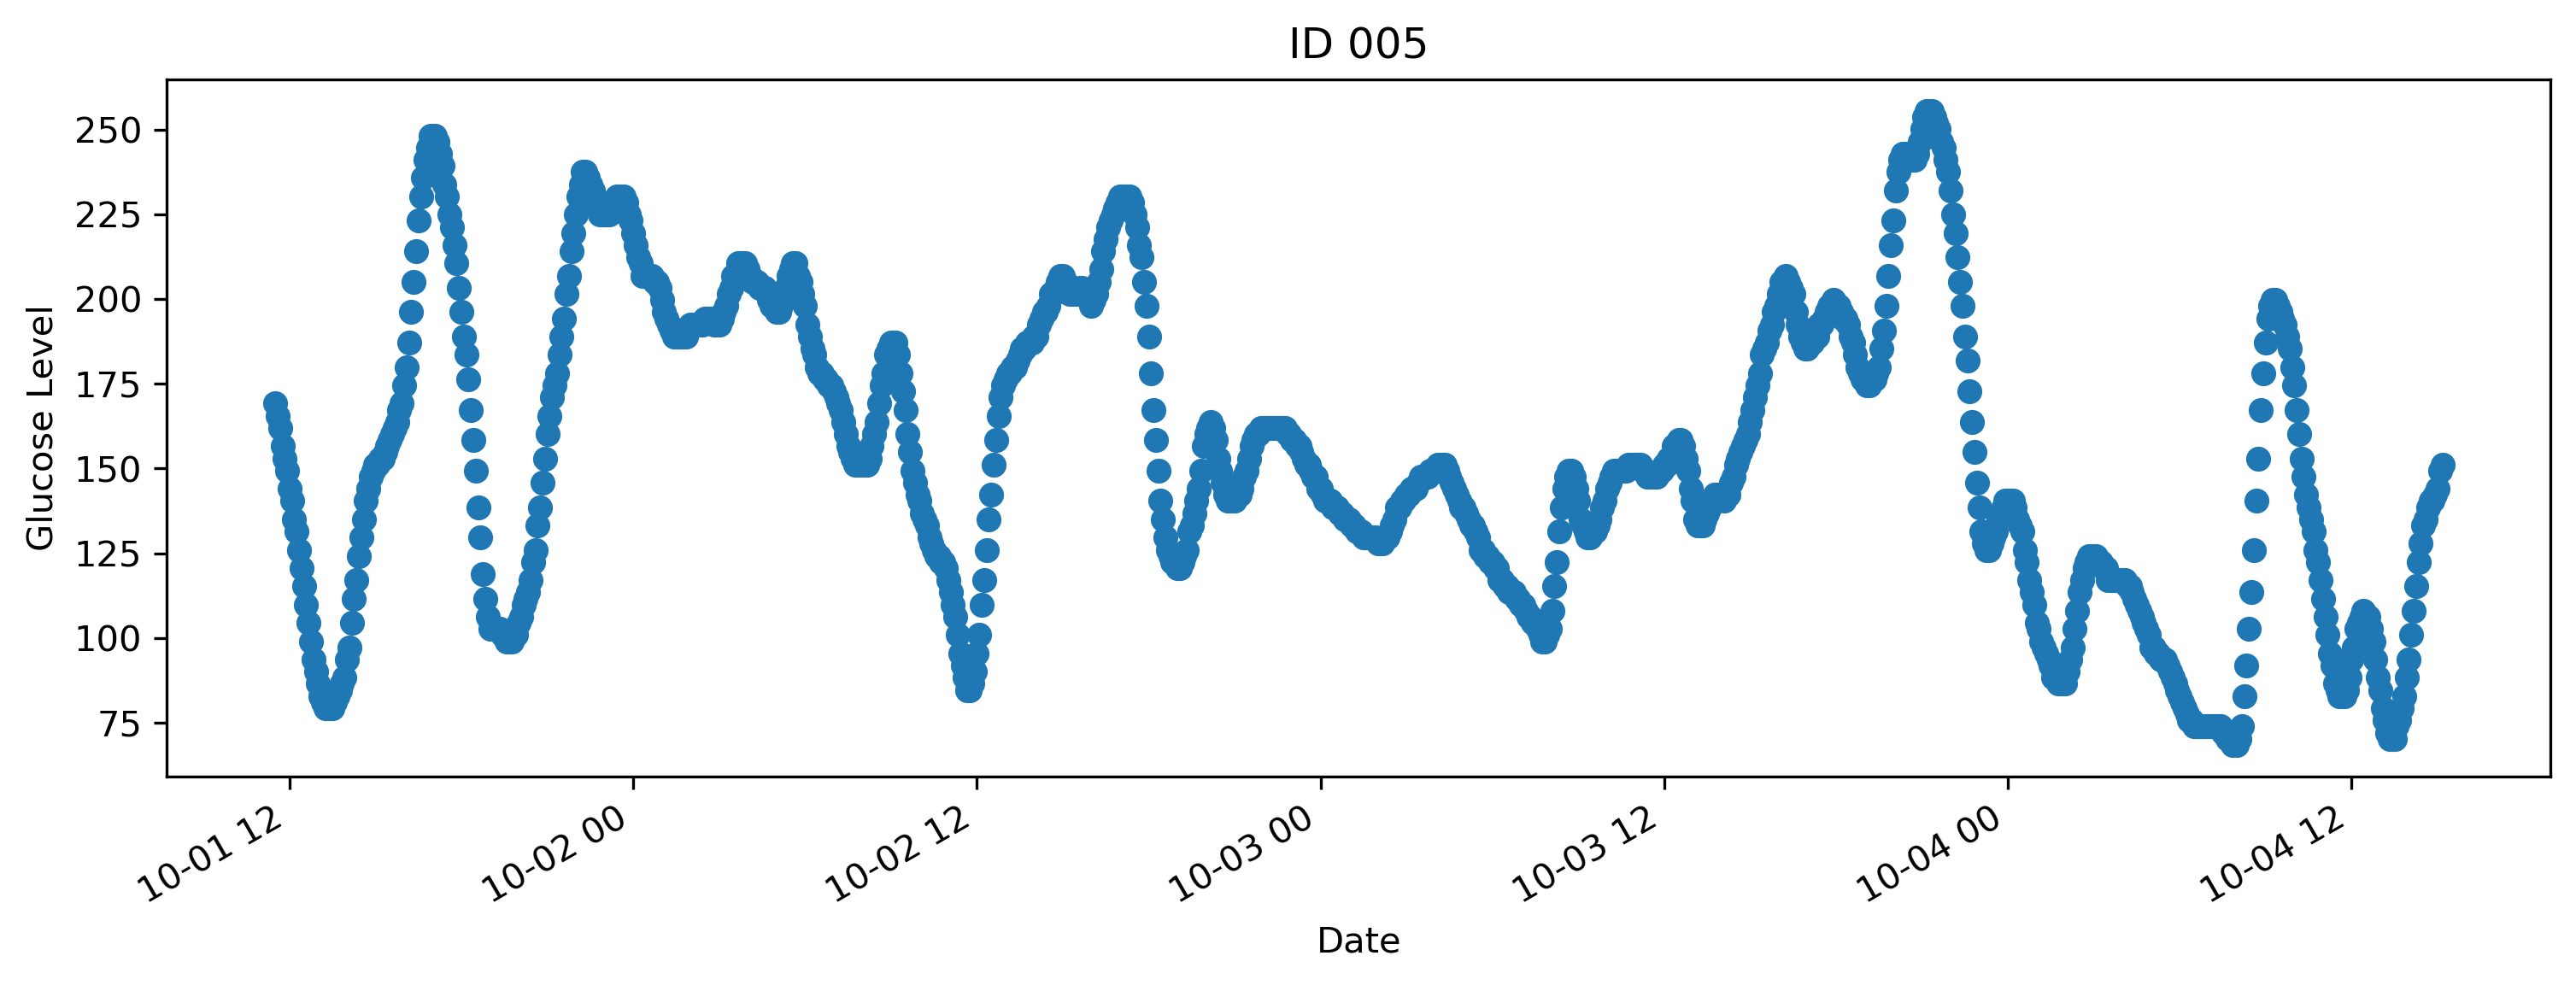

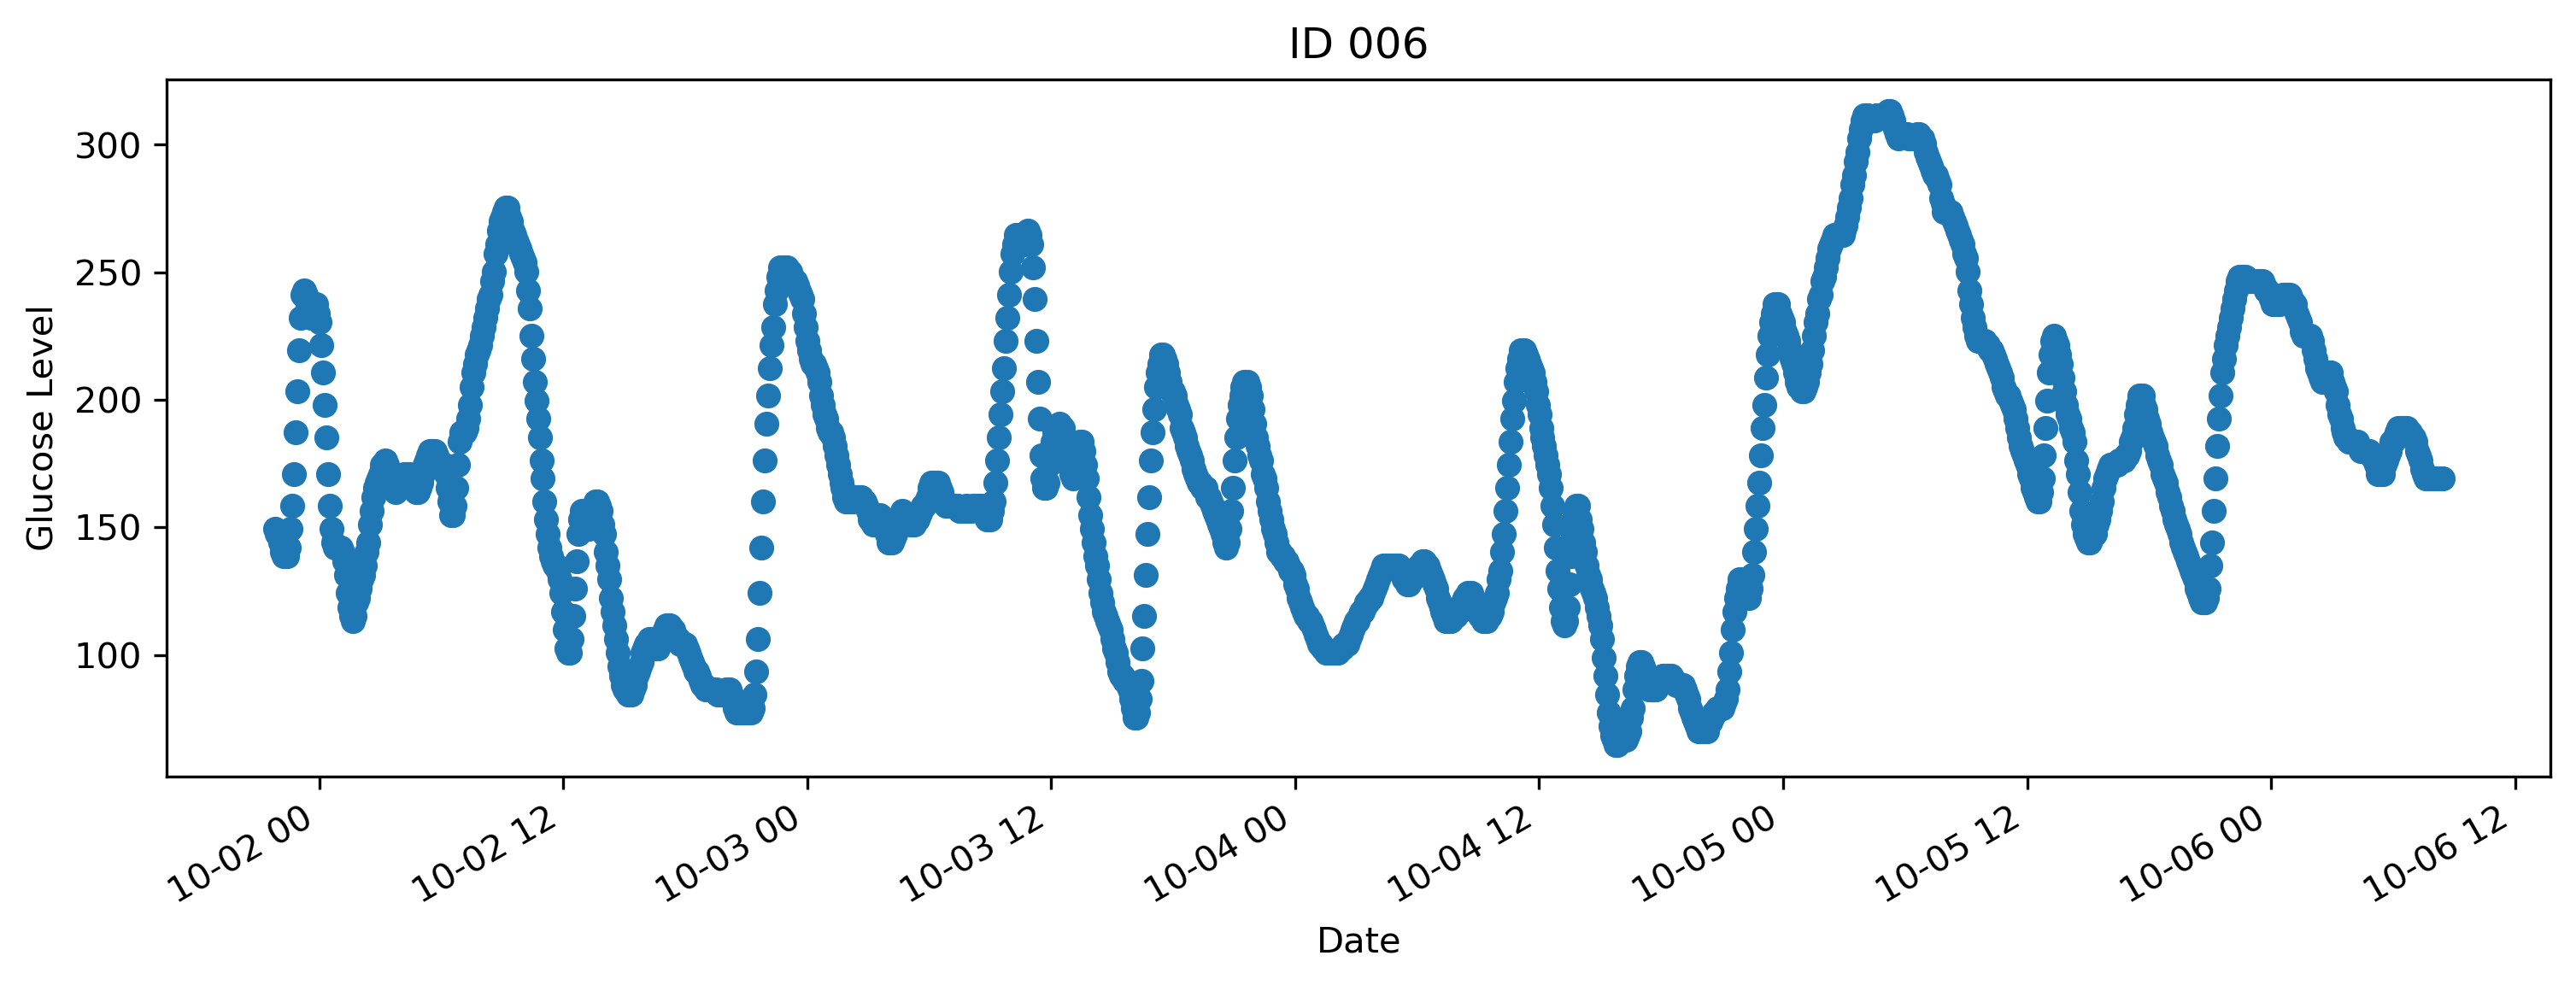

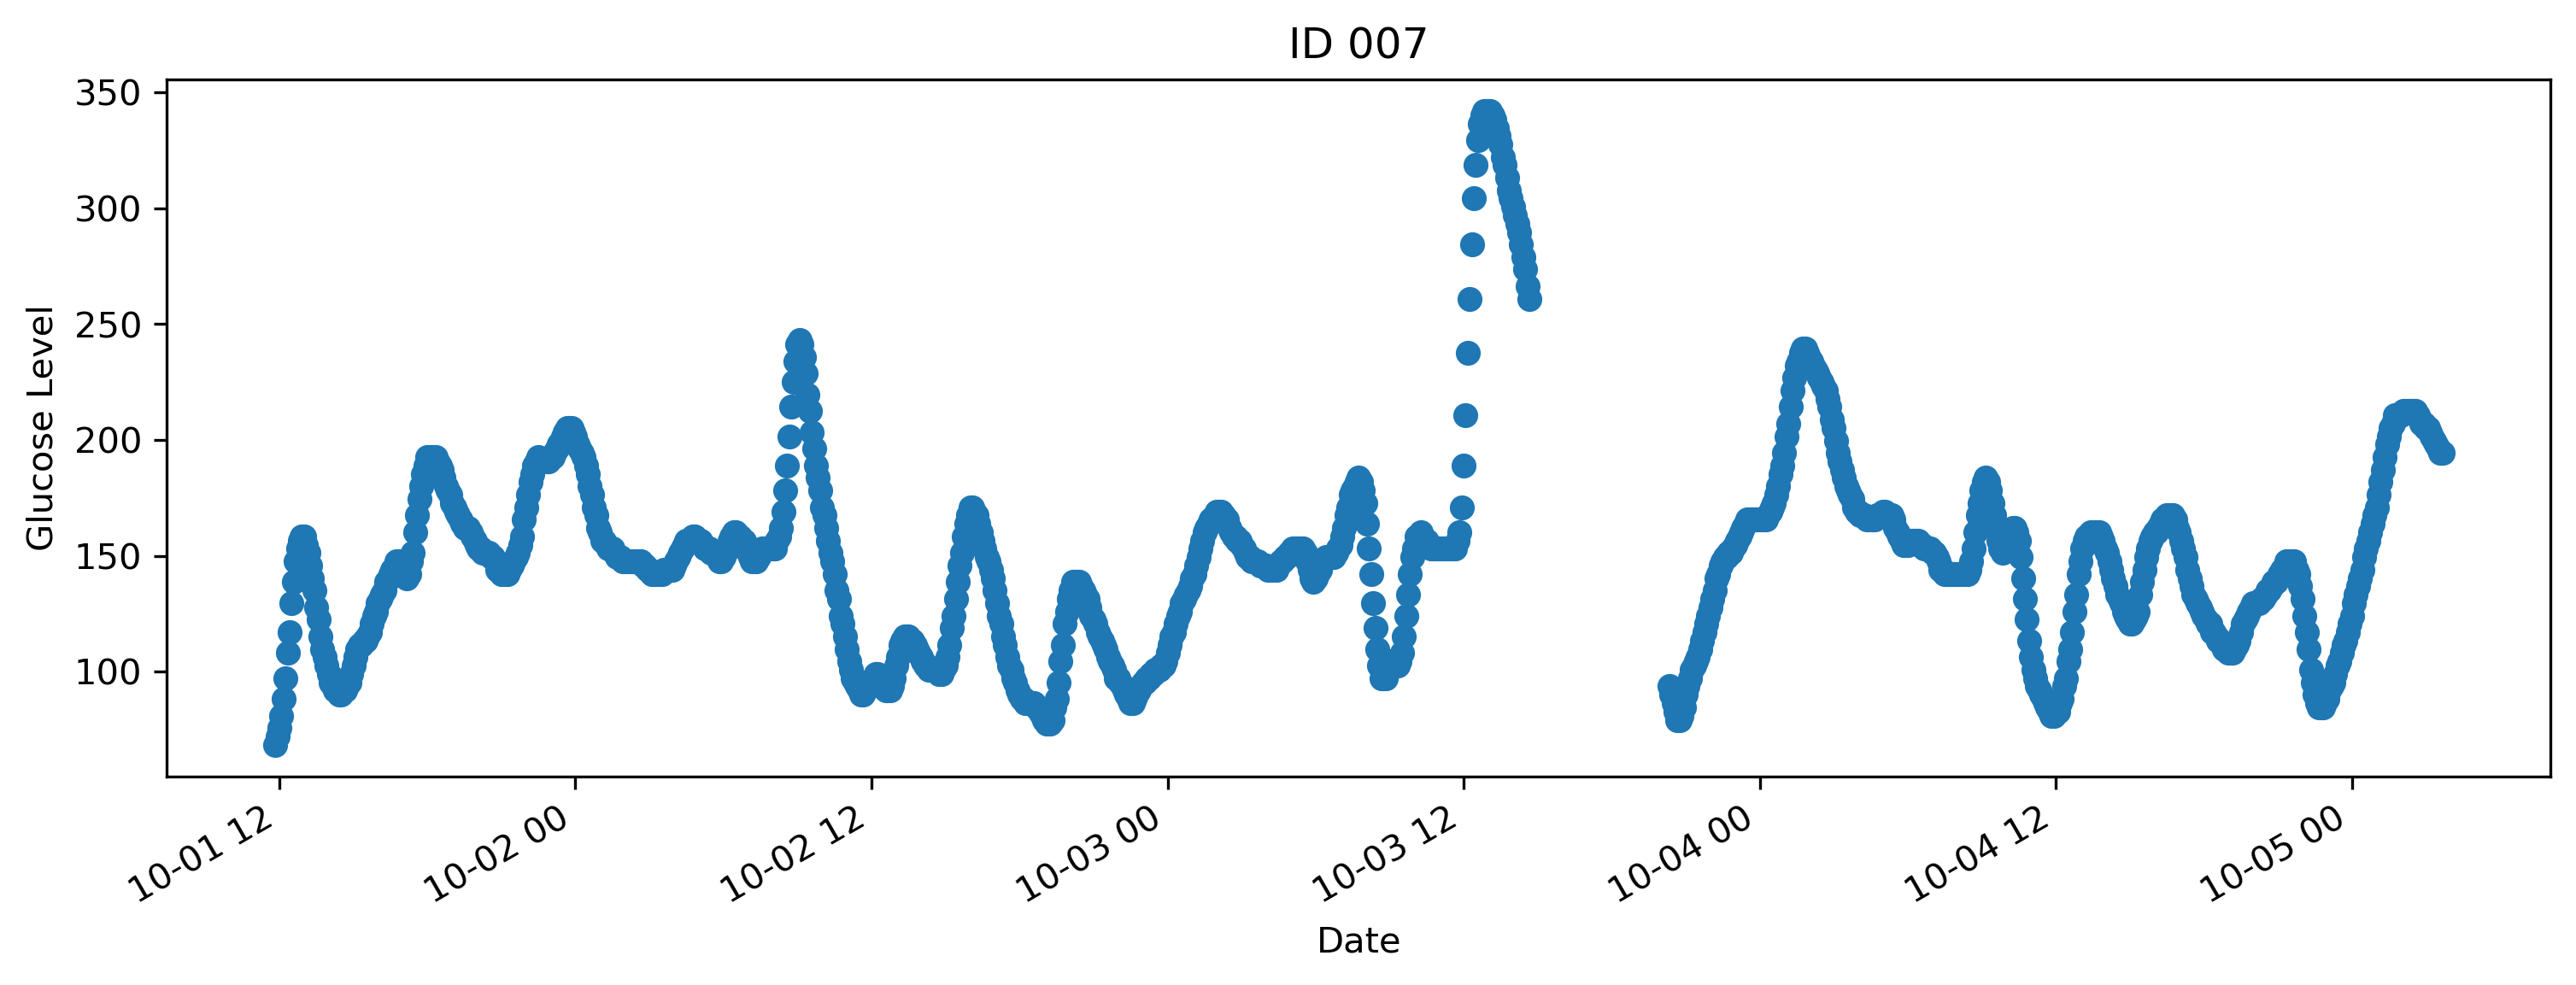

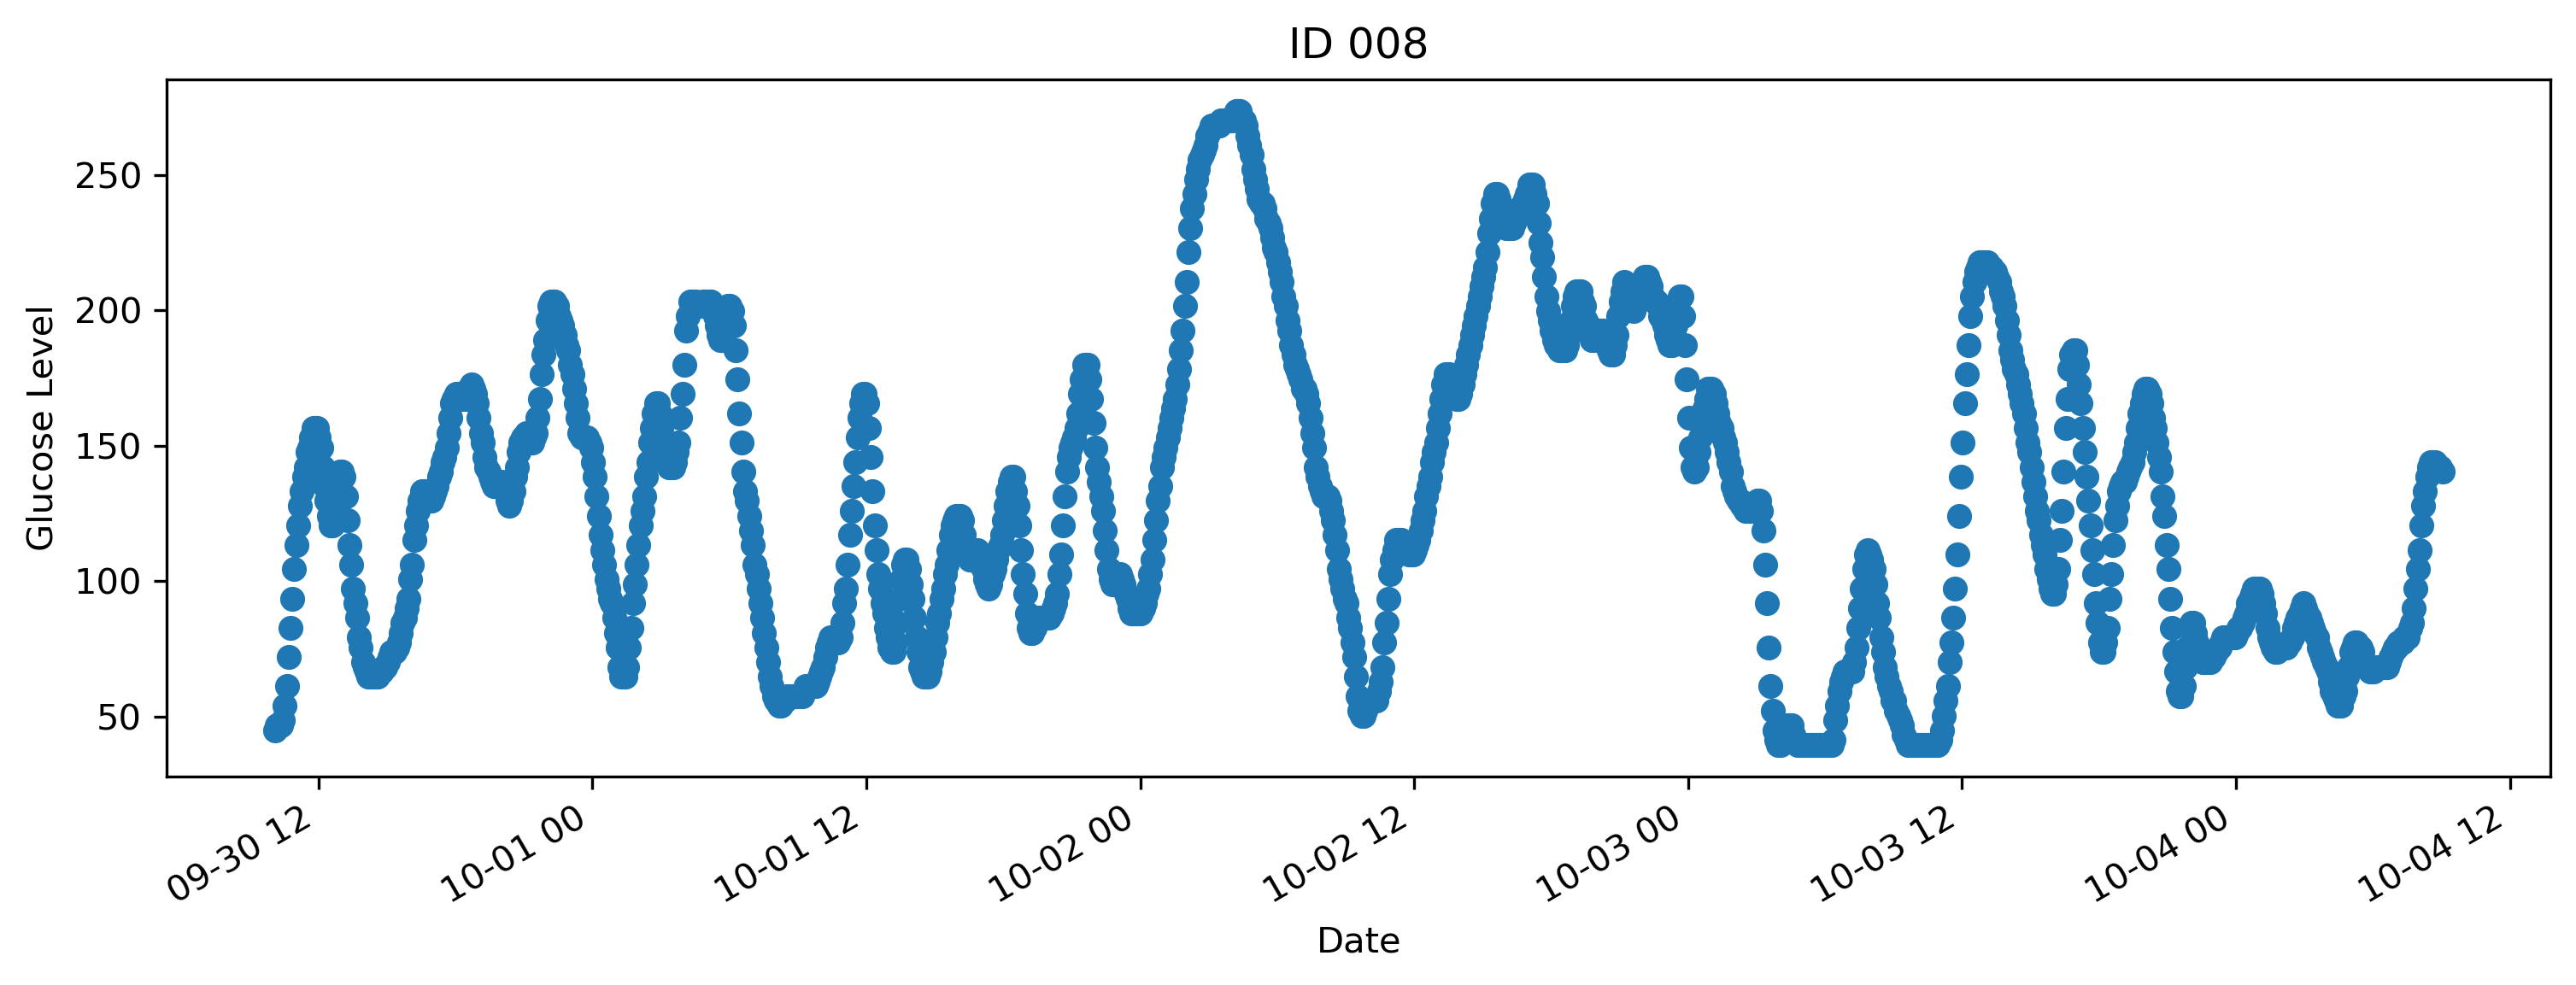

In [29]:
# Plot by ID
for ID in IDs:
    x = subj_data[ID].time # Time for x-axis (M-D-H)
    y = subj_data[ID].gl # Glucose for y-axis

    fig, ax = plt.subplots(figsize = (12,4), dpi = 300)
    ax.plot_date(x, y)
    plt.title("ID " + ID)
    plt.xlabel("Date")
    plt.ylabel("Glucose Level")
    
    fig.autofmt_xdate() # slant x-axis
    plt.show()

In [30]:
# Drop subject 009
df = df[df.id != "009"]
df

,id,time,gl
0,001,2014-10-01 19:14:00,185.4
1,001,2014-10-01 19:19:00,178.2
2,001,2014-10-01 19:24:00,176.4
3,001,2014-10-01 19:29:00,172.8
4,001,2014-10-01 19:34:00,169.2
...,...,...,...
7933,008,2014-10-04 08:41:56,144.0
7934,008,2014-10-04 08:46:56,142.2
7935,008,2014-10-04 08:51:56,142.2
7936,008,2014-10-04 08:56:56,142.2


In [31]:
# create new file
# df.to_csv("Dubosson2018_processed_modified.csv", encoding = "utf-8", index = False)

In [32]:
df

,id,time,gl
0,001,2014-10-01 19:14:00,185.4
1,001,2014-10-01 19:19:00,178.2
2,001,2014-10-01 19:24:00,176.4
3,001,2014-10-01 19:29:00,172.8
4,001,2014-10-01 19:34:00,169.2
...,...,...,...
7933,008,2014-10-04 08:41:56,144.0
7934,008,2014-10-04 08:46:56,142.2
7935,008,2014-10-04 08:51:56,142.2
7936,008,2014-10-04 08:56:56,142.2


In [33]:
subj_data['001']

,id,time,gl
0,001,2014-10-01 19:14:00,185.4
1,001,2014-10-01 19:19:00,178.2
2,001,2014-10-01 19:24:00,176.4
3,001,2014-10-01 19:29:00,172.8
4,001,2014-10-01 19:34:00,169.2
...,...,...,...
1408,001,2014-10-06 16:34:02,221.4
1409,001,2014-10-06 16:39:02,225.0
1410,001,2014-10-06 16:44:02,225.0
1411,001,2014-10-06 16:49:02,221.4
